<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Logo_EAFIT.png" width="350" align="center"></a>

# Proyecto Integrador Primer Semestre

<hr style="border:2px solid #004B85"> </hr>


## Representación gráfica georreferenciada de la clasificación de la calidad de planteles educativos con análisis de correlación con planteles vecinos categorizada por variables sociales, económicas y demográficas

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Logo_Calidad_Educativa.png" width="150" align="center"></a>

<hr style="border:2px solid #004B85"> </hr>

# Maestría en ciencia de los datos y analítica
## 16/06/2021
## Equipo de desarrollo

- #### Camilo Rivera Bedoya
- #### Juan David Corea
- #### Jose Ignacio Escobar
- #### Eliana Marcela Sierra
- #### Daniel Romero Cardona

<hr style="border:2px solid #004B85"> </hr>

# ¡¡¡Advertencia!!!

- este notebook fue desarrollado en Jupyter notebooks, el abrirlo con otros aplicativos como google colab u otros puede afectar el funconamiento del codigo o los markdowns.

<hr style="border:2px solid #004B85"> </hr>
<a name="conte"></a>
    
# Tabla de contenido
1. [Introduccion](#intro)
2. [Etapa 1: Recolección de la información](#e1)
3. [Etapa 2: Implementación del DataLake](#e2)
    1. [Crear bucket](#e2_bucket)
    2. [Creacion de Zonas (Carpetas)](#e2_zonas)
    3. [Cargar archivos](#e2_load)
4. [Etapa 3: Estructuración y preparación de los datos](#e3)
5. [Etapa 4: Análisis exploratorio de los datos](#e4)
    1. [Librerias](#e4_librerias)
    2. [Funciones](#e4_funciones)
    3. [Lectura Base de Datos - AWS](#e4_lect_aws)
    4. [Lectura Base de Datos - Local](#e4_lect_local)
        1. [Sedes](#e4_sedes)
        2. [Clasificacion Planteles](#e4_planteles)
        3. [Puntaje estudiantes por Plantel](#e4_estudiantes)
        4. [Unificar Base de Datos](#e4_unificar)
        5. [Limpieza Base de datos](#e4_limpiar)
    5. [Exploracion Bases de Datos](#e4_explo)
        1. [Variables Numéricas](#e4_numericas)
            1. [INDICE_MATEMATICAS](#e4_math)
            2. [INDICE_C_NATURALES](#e4_cnat)
            3. [INDICE_SOCIALES_CIUDADANAS](#e4_sociales)
            4. [INDICE_LECTURA_CRITICA](#e4_lectura)
            5. [INDICE_INGLES](#e4_ingles)
            6. [INDICE_TOTAL](#e4_total)
            7. [EVALUADOS_ULTIMOS_3](#e4_evaluados)
            8. [Correlaciones](#e4_corre)
        2. [Variables Categoricas](#e4_categoricas)
            1. [COLE_CALENDARIO_COLEGIO](#e4_calendario)
            2. [COLE_GENEROPOBLACION](#e4_genero)
            3. [COLE_NATURALEZA](#e4_naturaleza)
            4. [COLE_CATEGORIA](#e4_catetgoria)
            5. [ZONA](#e4_zona)
            6. [MODE_ESTRATOVIVIENDA](#e4_estrato)
            7. [MODE_EDU_MADRE](#e4_madre)
            8. [MODE_EDU_PADRE](#e4_padre)
            9. [IND_BILINGUE](#e4_bilingue)
            10. [CARACTER_IE](#e4_caracter)
6. [Etapa 5: Modelamiento del sistema de recomendación](#e5)
    1. [Selección de Parámetros](#e5_parametros)
    2. [k-means](#e5_kmeans)
        1. [Modelo - Métodos de selección de k](#e5_metodos)
        2. [Selección de k](#e5_kmsel)
        3. [Evaluación de Resultados](#e5_kmeval)
            1. [COLE_GENEROPOBLACION](#e5_genero)
            2. [MODE_ESTRATOVIVIENDA](#e5_estrato)
            3. [CARACTER_IE](#e5_caracter)
        4. [Prueba Clasificacion](#e5_prueba)
        5. [Centroides](#e5_centroides)
    3.[k-modes](#e5_kmodes)
        1. [Modelo - Métodos de selección de k](#e5_metodos2)
        2. [Selección de k](#e5_kmsel2)
        3. [Evaluación de Resultados](#e5_kmeval2)
            1. [COLE_GENEROPOBLACION](#e5_genero2)
            2. [MODE_ESTRATOVIVIENDA](#e5_estrato2)
            3. [CARACTER_IE](#e5_caracter2)
        4. [Prueba Clasificacion](#e5_prueba2)
        5. [Centroides](#e5_centroides2)
7. [Etapa 6: Implementación de la interfaz de usuario (FrontEnd)](#e6)
    1. [Barra de Navegacion](#e6_barra)
    2. [Presentación](#e6_presentacion)
    3. [Equipo de Trabajo](#e6_equipo)
    4. [Análisis Exploratorio](#e6_analisis)
    5. [Sistema de Recomendación](#e6_sistema)
        1. [Recomendadas por Cercanía](#e6_cercania)
        2. [Recomendadas por Caracteristicas](#e6_caracteristicas)
        3. [Mapa](#e6_mapa)
        4. [Ranking de planteles](#e6_ranking)
        5. [Calificación de los planteles en cada linea de profundización](#e6_linea)
8. [Repositorio](#repo)
        
<hr style="border:2px solid #004B85"> </hr>

<a name="intro"></a><hr style="border:1px solid green"> </hr>
# 1. [&#9673;](#conte) Introduccion
<hr style="border:1px solid green"> </hr>

El presente proyecto busca determinar cuál plantel educativo posee mayor calidad partiendo de condiciones de entrada definidas y ubicado en una zona particular y su correlación con planteles cercanos bajo las mismas condiciones, además, de obtener una recomendación de los planteles en un rango de distancia definido que cumplan condiciones de clusterización partiendo de las variables seleccionadas.

## Problema a resolver
- ¿Cuál institución educativa presenta mejor calidad partiendo de una ubicación especifica del municipio teniendo en cuenta características sociales, económicas y demográficas?
- ¿Cuál institución educativa presenta mejor calidad en el mismo municipio tomando características sociales y económicas?

## Solución propuesta
<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/solucion.png" width="250" align="center"></a>

El analisis se basará en variables que representan criterios reales, como la distancia espacial de un lugar específico respecto a las instituciones, su el rendimiento académico, el estrato socioeconómico entre otras variables propias de cada institución

La solución al problema se realizará de forma gráfica, y busca determinar un cerco de instituciones alrededor de la ubicación ingresada, que para casos prácticos puede ser la vivienda de estudiante donde se pueda filtrar por aquellas instituciones cercanas a las cuales pueda acceder.

Para dar solución a este propósito, nos apoyaremos en modelos de segmentación para poder encontrar clúster de instituciones educativas de acuerdo con características propias, el cálculo de distancias desde la georreferenciación, la creación de métricas ponderadas de criterios a la hora de determinar los cercos, análisis descriptivo-exploratorio para determinar correlaciones o relevancia de variables dentro del análisis.

## Metodología para la implementación
El proyecto se realizará en 6 etapas, mediante un sistema de recomendación desarrollado en Python con la base de datos de los resultados de las pruebas saber 11.

**Etapa 1: Recolección de la información**

Para esta etapa se debe descargar las diferentes bases de datos que serán utilizadas en el análisis. La caracterización de las instituciones, su georreferenciación y variaciones descriptivas adicionales. Al ser datos abiertos y disponibles al pública se hará de forma manual y se cargaran al repositorio de almacenamiento seleccionado.

**Etapa 2: Implementación del DataLake**

Dado el volumen de información y la necesidad de pre-procesar la información, se decide utilizar el Datalake de AWS (S3). Posterior a la ingesta, se procede a hacer un proceso de ETL vía GLUE que nos permita tener la información alojada en tablas en base datos para facilitar el proceso de consolidación de información.

**Etapa 3: Estructuración y preparación de los datos**

En dicha etapa se espera hacer un proceso de limpieza, consolidación y validación de la base de datos a utilizar con el fin de tener un único dataset unificado a nivel de institución educativo con todas las variables disponibles para posterior revisión de significancia y pertinencia. Para tal fin, el componente de Athena de AWS se vuelve el más indicado.

**Etapa 4: Análisis exploratorio de los datos**

En la etapa de exploración se busca hacer un análisis estadístico descriptivo de todas las variables disponibles de instituciones disponibles, desde un enfoque univariado (completitud, tendencia central, significancia, distribución) y multivariado (Correlación total y parcial, variabilidad, explicabilidad) que permita determinar cuáles serán las variables indicadas para proceder a la etapa de modelación e industrialización. Adicionalmente, en esta etapa también se incluye la creación de métricas.

**Etapa 5: Modelamiento del sistema de recomendación**

En primera instancia se busca desarrollar un modelo de corte no supervisado para identificar clúster o grupos de instituciones educativas que tengan características similares, y de esta manera poder análisis estos grupos internamente. De allí, que a la hora de seleccionar la institución más adecuada se pueda acotar la búsqueda entregando el clúster con más cercanía a las características solicitadas. Para ello se busca testear modelos como:

- K-Means
- DBSCAN
- Mean Shift
- AGNES, entre otros

Posterior al modelamiento se busca hacer una evaluación del modelo óptimo, de ahí que revisando en la literatura nos apoyaremos en validaciones internas y externas, donde en la primera se calculara la cohesión (Minimización de la distancia entre integrantes del clúster) y la separación (Maximización de distancia entre los grupos encontrados).

Entendiendo el comportamiento o las particularidades de las instituciones, se propone una aproximación de sistema de recomendación donde se tenga en cuenta una la geolocalización de referencia, así como algunas variables socioeconómicas que permitan acotar las opciones, de manera que al tener el claro los clústeres que más se ajusten, se tengan también la distancia a las instituciones más cercanas que se encuentran dentro de dichos segmentos.

**Etapa 6: Implementación de la interfaz de usuario (FrontEnd)**

Basándonos en la API suministrada por las librerías de las aplicaciones Gis para el lenguaje Python se construirá una aplicación web que permitirá ingresar los parámetros de entrada definidos por el modelo y mostrará el mapa con las instituciones que cumplen con la condición de cercanía y clusterización. Además, listará ordenadamente estas instituciones partiendo de la calificación de calidad en resultados en las pruebas saber 11, su grafica de distribución de resultados desde el año 2010 de sus estudiantes.

<a name="e1"></a><hr style="border:1px solid green"> </hr>
# 2. [&#9673;](#conte) Etapa 1: Recolección de la información
<hr style="border:1px solid green"> </hr>

## Fuentes de datos
Las fuentes de datos para el desarrollo del proyecto se obtuvieron de las páginas de ICFES y de Datos Abiertos Colombia del Ministerio de Tecnologías de la Información y las Comunicaciones, ambas fuentes de información pública disponibles para proposito general, con las siguientes caracteristicas

El repositorio de datos, DataICFES, contiene información de las pruebas que desarrolla el ICFES. Además, pone a disposición de los investigadores, estudiantes, comunidad educativa y comunidad general, los instrumentos necesarios para adelantar investigaciones que estén orientadas al mejoramiento de la calidad educativa.
El repositorio de DATOS ABIERTOS COLOMBIA tiene como objetivo promover y habilitar las condiciones para el uso de los datos y en la actualidad cuenta con mas de 5526 datos disponibles para investigar, desarrollar aplicaciones, crear visualizaciones e historias.

- [ICFES](https://www.icfes.gov.co/)

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/icfes.png" width="150" align="Left"></a>

1. **BASE DE DATOS 1** “SB11-CLASIFI-PLANTELES-20182”: Esta base de datos es la que nos brinda información acerca de los puntajes por institución  de la prueba saber 11 de cada una de las diferentes asignaturas que tiene en cuenta esta prueba de conocimientos. Para el análisis de la información solo se tendrá en cuenta la variable de índice total que es el promedio ponderado de cada uno de los resultados de las asignaturas.
2. **BASE DE DATOS 2** “puntaje.csv” Esta base de datos nos brinda información acerca del puntaje por estudiante y por institución.Así mismo como la información socioeconómica de cada familia del estudiante
   
   
- [Datos Abiertos](https://www.datos.gov.co/)

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Daos_Abiertos.png" width="220" align="Left"></a>

   - **BASE DE DATOS 3** “SedesSise_report.csv”: Esta base de datos nos suministra información acerca de las características geográficas de cada una de las instituciones, las principales características son  la longitud, latitud y zona geográfica en colombia. Esta información nos va permitir por medio de un análisis de recomendación ubicar las mejores instituciones de acuerdo a diferentes filtros de georeferenciación que el usuario aplique en la búsqueda.

<a name="e2"></a><hr style="border:1px solid green"> </hr>
# 3. [&#9673;](#conte) Etapa 2: Implementación del DataLake

1. [Crear bucket](#e2_bucket)
2. [Creacion de Zonas (Carpetas)](#e2_zonas)
3. [Cargar archivos](#e2_load)

<hr style="border:1px solid green"> </hr>

se implementara un Data Lake con la siguiente estructura:

- **Landing Zone:** en esta zona se cargan todos los archivos (BD) necesarios para la realizacion del proyecto


- **Raw Zone:** En esta zona almacenamos los datos que no necesitan ser procesados ya que no seran utiles en el procesamiento de la información


- **Refined Zone:** En esta zona se mantendrán los datos que han sido manipulados para el análisis de la información  


- **Trusted Zone:** En esta zona se realiza la validación  y /o otro procesamiento adicional que se deba ejecutar. 

Para Esto nos apoyamos en los recursos de AWS, con la herramienta **S3**.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/S3.png" width="220" align="center"></a>

<a name="e2_bucket"></a><hr style="border:1px solid black"> </hr>

## 3.1. [&#9678;](#e2) Crear Bucket

<hr style="border:1px solid black"> </hr>

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/bucket.png" width="700" align="center"></a>

Primero creamos un bucket en S3 con el nombre "**pidatalake**"

### Caracteristicas:

- **Nombre:** pidatalake
- **Región:** EE. UU. Este (Norte de Virginia) us-east-1
- **Configuración de bloqueo de acceso publico:** Ningun bloqueo (publico para pagina web)
- **Control de versiones:** Desactivado
- **Etiquetas:** Ninguna etiqueta
- **Cifrado:** Desactivado
- **Bloqueo de Objetos:** Desactivado

<a name="e2_zonas"></a><hr style="border:1px solid black"> </hr>

## 3.2. [&#9678;](#e2) Creacion de Zonas (Carpetas)

<hr style="border:1px solid black"> </hr>

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Zonas_carpetas.png" width="1000" align="center"></a>

<a name="e2_load"></a><hr style="border:1px solid black"> </hr>

## 3.3. [&#9678;](#e2) Cargar archivos

<hr style="border:1px solid black"> </hr>

los archivos se cargan directamente a la landing zone en dos carpetas: **ICFES** y **DANE**


<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Landing.png" width="600" align="center"></a>

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/landing_icfes.png" width="1000" align="center"></a>

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Landing_Dane.png" width="900" align="center"></a>

<a name="e3"></a><hr style="border:1px solid green"> </hr>
# 4. [&#9673;](#conte) Etapa 3: Estructuración y preparación de los datos
<hr style="border:1px solid green"> </hr>

Una vez estructurado nuestro Buckets en **Amazon S3** el siguiente paso es convertir estos archivos en
información(interpretarlos), para esto el servicio de **AWS Glue** nos permite generar rastreadores,
estos rastreadores se deben configurar para que puedan identificar el esquema de los archivos
almacenados en **S3** para que estos se puedan interpretar como tablas que se almacenan en una base
de datos. Ya que en nuestro datalake contamos con una variedad amplia de fuentes y de formatos es
necesario la creación de diferentes bases de datos, tablas y por ende rastreadores

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Glue.png" width="170" align="center"></a>


Una ves se realiza este proceso la base de datos esta lista y disponible para ser consultado desde diferentes etapas del desarrollo.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/etl.png" width="500" align="center"></a>

otra manera de realizar este proceso es a travez de codigo, para esto se puede observar el procedimiento de los primeros pasos de la Etapa 4 

<a name="e4"></a><hr style="border:1px solid green"> </hr>
# 5. [&#9673;](#conte) Etapa 4: Análisis exploratorio de los datos

1. [Librerias](#e4_librerias)
2. [Funciones](#e4_funciones)
3. [Lectura Base de Datos - AWS](#e4_lect_aws)
4. [Lectura Base de Datos - Local](#e4_lect_local)
    1. [Sedes](#e4_sedes)
    2. [Clasificacion Planteles](#e4_planteles)
    3. [Puntaje estudiantes por Plantel](#e4_estudiantes)
    4. [Unificar Base de Datos](#e4_unificar)
    5. [Limpieza Base de datos](#e4_limpiar)
5. [Exploracion Bases de Datos](#e4_explo)
    1. [Variables Numéricas](#e4_numericas)
        1. [INDICE_MATEMATICAS](#e4_math)
        2. [INDICE_C_NATURALES](#e4_cnat)
        3. [INDICE_SOCIALES_CIUDADANAS](#e4_sociales)
        4. [INDICE_LECTURA_CRITICA](#e4_lectura)
        5. [INDICE_INGLES](#e4_ingles)
        6. [INDICE_TOTAL](#e4_total)
        7. [EVALUADOS_ULTIMOS_3](#e4_evaluados)
        8. [Correlaciones](#e4_corre)
    2. [Variables Categoricas](#e4_categoricas)
        1. [COLE_CALENDARIO_COLEGIO](#e4_calendario)
        2. [COLE_GENEROPOBLACION](#e4_genero)
        3. [COLE_NATURALEZA](#e4_naturaleza)
        4. [COLE_CATEGORIA](#e4_catetgoria)
        5. [ZONA](#e4_zona)
        6. [MODE_ESTRATOVIVIENDA](#e4_estrato)
        7. [MODE_EDU_MADRE](#e4_madre)
        8. [MODE_EDU_PADRE](#e4_padre)
        9. [IND_BILINGUE](#e4_bilingue)
        10. [CARACTER_IE](#e4_caracter)

<hr style="border:1px solid green"> </hr>

<a name="e4_librerias"></a><hr style="border:1px solid black"> </hr>

## 5.1. [&#9678;](#e4) Librerias

<hr style="border:1px solid black"> </hr>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from scipy.spatial.distance import cdist # distancias entre matrices
from sklearn import cluster #algoritmos de clasificación
from sklearn.metrics import silhouette_score
import sys
from scipy.spatial import distance
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm
from IPython.display import HTML, display
from matplotlib.ticker import PercentFormatter
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.stats import diagnostic
import scipy.stats as sta
import unicodedata
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# git clone https://github.com/nicodv/kmodes.git
# cd kmodes
# python setup.py install
# or
# pip install kmodes
from kmodes.kmodes import KModes

<a name="e4_funciones"></a><hr style="border:1px solid black"> </hr>

## 5.2. [&#9678;](#e4) Funciones

<hr style="border:1px solid black"> </hr>

In [2]:
def wavg(group, avg_name, weight_name):
    ''' Funcion para calcular promedio ponderado de indicadores
    por año e institucion'''
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [3]:
def k_selection(dataframe, min_k, max_k):
    '''
    Función que corre múltiples modelos k-means con diferentes
    números de clusters, calcula y grafica la distancia a los centroides
    de los clusters de cada punto para determinar el número de clusters 
    adecuado aplicando diferentes métodos.
    
    Input:
    ------------------------
    dataframe: pd.DataFrame
        DataFrame con todos los datos para entrenar el modelo.
    min_k: Int
        Número mínimo de clusters a tener en cuenta en las iteraciones.
    max_k: Int
        Número máximo de clusters a tener en cuenta en las iteraciones.
    
    Output:
    ------------------------
    k_mean_algs: List
        Lista de objetos algoritmo K-means.
    k_mean_res: List
        Lista de resultados del algoritmo K-means.
    '''
    cluster_nums = range(min_k, max_k + 1)# Lista de número de clusters
    k_mean_algs = [cluster.KMeans(n_clusters = k, random_state = 123) for k in cluster_nums]# Lista de objetos algoritmo K-means
    k_mean_res =[]
    sil = []
    for alg in k_mean_algs:
        k_mean_res.append(alg.fit(dataframe))
        labels = alg.labels_
        sil.append(silhouette_score(dataframe, labels, metric = 'euclidean'))
    #k_mean_res = [alg.fit(dataframe) for alg in k_mean_algs]# Lista de resultados del algoritmo K-means
    centroids = [res.cluster_centers_ for res in k_mean_res]# Lista con los centroides por cada valor de k
    # Lista que almacena la distancia euclidea entre los puntos y los centroides para cada cas de k
    distances = [cdist(dataframe, centroid, 'euclidean') for centroid in centroids] 
    # Get the closest centroid (and the corresponding distance)
    min_indices = [np.argmin(distance, axis = 1) for distance in distances]
    min_distances = [np.min(distance, axis = 1) for distance in distances]
    avg_sum_squares = [sum(dist ** 2) / dataframe.shape[0] for dist in min_distances]# Calculo de la distancia cuadrada promedio
    # Gráfica de codo
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cluster_nums, avg_sum_squares, 'b*-')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Error cuadrado promedio')
    plt.title('Grafica de Codo')
    plt.show()
    plt.plot(cluster_nums,sil, 'b*-')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Silhouette Value')
    plt.title('Silhouette Method')
    plt.show()
    return (k_mean_algs, k_mean_res)

In [4]:
def tabla_cluster(data,variable):
    '''
    Función para hacer tabla donde se cuentan los puntos por categoría
    según una variable determinada.
    
    Input:
    ------------------------
    data: pd.DataFrame
        DataFrame con todos los datos.
    variable: String
        Variable por la cual se agrupa en la tabla.
    
    Output:
    ------------------------
    tbl_pvt: pd.DataFrame
        Tabla agrupada con cuenta de fronteras por categoría.
    '''
    tbl = data[[variable, 'Cluster']]
    tbl_grp = tbl.groupby(tbl.columns.tolist(), as_index = False).size()
    tbl_frm = tbl_grp
    tbl_frm.columns = [variable, 'Cluster', 'Cuenta']
    tbl_pvt = pd.pivot_table(tbl_frm, index = variable, columns = 'Cluster', values = 'Cuenta').fillna(0).astype(int)
    return (tbl_pvt,tbl_frm)

In [5]:
def cluster_scatter_plot(tbl_frm,variable):
    '''
    Función para graficar la cantidad de fronteras por cluster
    y por una variable.
    
    Input:
    ------------------------
    tbl_frm: pd.DataFrame
        Tabla con la información para la gráfica.
    variable: String
        Variable contra la cual se graficara, toma dos valores
        'Nivel_Tension' o 'Tipo'.
    '''
    tbl_frm['Cuenta'] = ((tbl_frm.loc[:,'Cuenta']/(tbl_frm.groupby(tbl_frm.Cluster).transform('sum')).loc[:,'Cuenta'])*500)
    tbl_frm['Cuenta'] = tbl_frm['Cuenta'].astype('float').round(0).astype('int')
    type_uniq, type_n = np.unique(tbl_frm[variable], return_inverse = True)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(x = tbl_frm['Cluster'], y = type_n, s = tbl_frm['Cuenta'])
    ax.set(yticks = np.unique(type_n), yticklabels = type_uniq)
    plt.show()

In [6]:
def print_one_way_counts_table(col):
    col= pd.Series(np.where(col.isnull(), 'Sin dato', 'Con dato'))
    #freq_table = one_way_table(col=col_count_data, idx_name=idx_name)
    if col is None:
        raise TypeError("Verifique que haya asignado algún objeto al parámetro: 'col'")
    elif col.dtype != 'object':
        raise TypeError("Verifique que el valor asignado al parámetros: 'col', es de tipo: 'object'")
    abs_freq = pd.DataFrame(col.value_counts())
    rel_freq = pd.DataFrame(col.value_counts(normalize=True))
    cum_rel_freq = rel_freq.cumsum()
    freq_table = pd.concat([abs_freq, rel_freq, cum_rel_freq], axis=1)
    freq_table.columns = ['Frec.Abs.','Frec.Rel.', 'Frec.Rel.Acum.']
    #freq_table.index.name = idx_name
    freq_table.sort_values(by=['Frec.Abs.'], ascending=False)
    freq_table=  widgets.HTML(freq_table.style\
                        .format({'Frec.Abs.': '{:,}',
                                 'Frec.Rel.': '{:.2%}',
                                 'Frec.Rel.Acum.': '{:.2%}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render())		
    display(HTML("<h3>Conteo de registros</h3><br>"))
    display(freq_table)

In [7]:
def print_one_way_table(col):

    if col is None:
        raise TypeError("Verifique que haya asignado algún objeto al parámetro: 'col'")
    elif col.dtype != 'object':
        raise TypeError("Verifique que el valor asignado al parámetros: 'col', es de tipo: 'object'")
    abs_freq = pd.DataFrame(col.value_counts())
    rel_freq = pd.DataFrame(col.value_counts(normalize=True))
    cum_rel_freq = rel_freq.cumsum()
    freq_table = pd.concat([abs_freq, rel_freq, cum_rel_freq], axis=1)
    freq_table.columns = ['Frec.Abs.','Frec.Rel.', 'Frec.Rel.Acum.']
    freq_table.index.name = 'Categorías'
    freq_table.sort_values(by=['Frec.Abs.'], ascending=False)
    display(HTML("<h3>Conteo de frecuencias</h3><br>"))
    display(widgets.HTML(freq_table.style\
                        .format({'Frec.Abs.': '{:,}',
                                 'Frec.Rel.': '{:.2%}',
                                 'Frec.Rel.Acum.': '{:.2%}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [8]:
def print_central_tendency_measures(col):
    warnings.filterwarnings("ignore")
    notnull_col = col[~np.isnan(col)]
    percentiles = dict(notnull_col.quantile([.05,.25,.5,.75,.95]))
    measures = {}
    measures['Moda'] = notnull_col.mode()[0]
    measures['Media'] = notnull_col.mean()
    try:
        measures['Media Armónica'] = stats.hmean(notnull_col)
    except:
        measures['Media Armónica'] = np.nan
    try:
        measures['Media Geométrica'] = stats.gmean(notnull_col)
    except:
        measures['Media Geométrica'] = np.nan
    measures['Media Cuadrática'] = np.sqrt(np.sum(np.square(notnull_col)) / notnull_col.count())
    measures['Media Trunc.(5%)'] = stats.trim_mean(a=notnull_col, proportiontocut=.05)
    measures['Media IQ'] = stats.trim_mean(a=notnull_col, proportiontocut=.25)
    measures['Media Wins.(5%)'] = np.mean(stats.mstats.winsorize(notnull_col, limits=0.05))
    measures['Trimedia'] = (percentiles[.25] + 2 * percentiles[.5] + percentiles[.75]) / 4
    measures['Mediana'] = np.median(notnull_col)
    measures['Mid Range'] = (notnull_col.min() + notnull_col.max()) / 2 
    measures['Mid Hinge'] = (percentiles[.25] + percentiles[.75]) / 2
    statistics = pd.DataFrame.from_dict(data=measures, orient='index', columns=['Resultado'])
    statistics.index.names = ['Medida']
    display(HTML("<h3>Tendencia central</h3><br>"))
    display(widgets.HTML(statistics.style\
                        .format({'Resultado':'{:,.2f}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [9]:
def location_measures(col):

    notnull_col = col[~np.isnan(col)]
    percentiles = dict(notnull_col.quantile([.01,.05,.1,.25,.5,.75,.9,.95,.99]))
    measures = {}
    measures['Mínimo'] = notnull_col.min()
    measures.update({'Percentil ' + str(int(key * 100)):value for (key, value) in percentiles.items()})
    measures['Máximo'] = notnull_col.max()
    statistics = pd.DataFrame.from_dict(data=measures, orient='index', columns=['Resultado'])
    statistics.index.names = ['Medida']
    return widgets.HTML(statistics.style\
                        .format({'Resultado':'{:,.2f}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render())

In [10]:
def print_location_measures(col):

    notnull_col = col[~np.isnan(col)]
    percentiles = dict(notnull_col.quantile([.01,.05,.1,.25,.5,.75,.9,.95,.99]))
    measures = {}
    measures['Mínimo'] = notnull_col.min()
    measures.update({'Percentil ' + str(int(key * 100)):value for (key, value) in percentiles.items()})
    measures['Máximo'] = notnull_col.max()
    statistics = pd.DataFrame.from_dict(data=measures, orient='index', columns=['Resultado'])
    statistics.index.names = ['Medida']
    display(HTML("<h3>Posición</h3><br>"))
    display(widgets.HTML(statistics.style\
                        .format({'Resultado':'{:,.2f}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [11]:
def print_spread_measures(col):

    notnull_col = col[~np.isnan(col)]
    percentiles = dict(notnull_col.quantile([.01,.05,.1,.25,.5,.75,.9,.95,.99]))
    measures = {}
    measures["Desv. Est."] = notnull_col.std()
    measures['Rango'] = notnull_col.max() - notnull_col.min()
    measures['Rango IQ'] = stats.iqr(notnull_col)
    measures['Dif. Abs. Media'] = notnull_col.mad()
    measures['Dif. Abs. Mediana'] = np.median(np.abs(notnull_col - notnull_col.median()))
    measures['Coef. Var.'] = stats.variation(notnull_col)
    measures['QCD'] = (percentiles[0.75] - percentiles[0.25]) / (percentiles[0.75] + percentiles[0.25])
    statistics = pd.DataFrame.from_dict(data=measures, orient='index', columns=['Resultado'])
    statistics.index.names = ['Medida']
    display(HTML("<h3>Dispersión</h3><br>"))
    display(widgets.HTML(statistics.style\
                        .format({'Resultado':'{:,.2f}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [12]:
def print_shape_measures(col):

    notnull_col = col[~np.isnan(col)]
    measures = {}
    measures['Asimetría'] = col.skew()
    measures['Exc.Curtosis'] = col.kurtosis()
    statistics = pd.DataFrame.from_dict(data=measures, orient='index', columns=['Resultado'])
    statistics.index.names = ['Medida']
    display(HTML("<h3>Forma</h3><br>"))
    display(widgets.HTML(statistics.style\
                        .format({'Resultado':'{:,.2f}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [13]:
def univar_histogram_plot(col):

    notnull_col = col[~np.isnan(col)]
    plt.style.use('default')
    fig, ax1 = plt.subplots(figsize=(4.8, 3.4))
    sns.distplot(notnull_col, hist=True, kde=True)
    plt.axvline(notnull_col.mean(), color='green', linestyle='dashed', linewidth=2, label="Media")
    plt.axvline(notnull_col.median(), color='blue', linestyle='dashed', linewidth=2, label="Mediana")
    plt.title('Histograma y densidad', fontweight='bold', fontsize=13, fontfamily='arial')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.set_xticklabels(['{:,.2f}'.format(x) for x in ax1.get_xticks()], fontsize=10, fontfamily='arial')
    plt.yticks(fontsize=10, fontfamily='arial')
    plt.xlabel(notnull_col.name, fontweight='bold', fontsize=11, fontfamily='arial')
    plt.ylabel("Densidad", fontweight='bold', fontsize=11, fontfamily='arial')
    leg=plt.legend(loc='upper right', title='Estadísticos')
    plt.setp(leg.get_title(), fontweight='bold', fontsize=10, fontfamily='arial')
    plt.setp(leg.get_texts(), fontsize=9, fontfamily='arial')
    plt.show()

In [14]:
def univar_violin_plot(col):

    notnull_col = col[~np.isnan(col)]
    plt.style.use('default')
    fig, ax1 = plt.subplots(figsize=(5.0, 3.4))
    sns.violinplot(x=notnull_col, palette='Blues')
    plt.title('Diagrama de Violín', fontweight='bold', fontsize=13, fontfamily='arial')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.set_xticklabels(['{:,.2f}'.format(x) for x in ax1.get_xticks()], fontsize=10, fontfamily='arial')
    plt.xlabel(notnull_col.name, fontweight='bold', fontsize=11, fontfamily='arial')
    plt.show()

In [15]:
def univar_box_plot(col):

    notnull_col = col[~np.isnan(col)]
    plt.style.use('default')
    fig, ax1 = plt.subplots(figsize=(5.0, 3.4))
    sns.boxplot(x=notnull_col, palette='Blues')
    plt.axvline(notnull_col.mean(), color='green', linestyle='dashed', linewidth=2, label='Media')
    plt.title('Diagrama de caja y bigotes', fontweight='bold', fontsize=13, fontfamily='arial')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.set_xticklabels(['{:,.2f}'.format(x) for x in ax1.get_xticks()], fontsize=10, fontfamily='arial')
    plt.xlabel(notnull_col.name, fontweight='bold', fontsize=11, fontfamily='arial')
    leg=plt.legend(loc='upper right', title='Estadístico')
    plt.setp(leg.get_title(), fontweight='bold', fontsize=10, fontfamily='arial')
    plt.setp(leg.get_texts(), fontsize=9, fontfamily='arial')
    plt.show()

In [16]:
def univar_donut_plot(col):
    col_counts = col.value_counts(ascending=False)
    plt.style.use('default')
    plt.figure(figsize=(5.2, 3.6))
    explode=np.repeat(0.03, len(col_counts))
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    plt.pie(x=col_counts, explode=explode, labels=None, autopct='%1.1f%%', textprops={'fontsize': 10, 'fontfamily': 'arial'}, pctdistance=0.85, startangle=90)
    plt.gcf().gca().add_artist(centre_circle)
    plt.title('Diagrama circular', fontweight='bold', fontsize=13, fontfamily='arial')
    leg=plt.legend(labels=col_counts.index, loc="lower left", title=col.name, framealpha=0.4)
    plt.setp(leg.get_title(), fontweight='bold', fontsize=10, fontfamily='arial')
    plt.setp(leg.get_texts(), fontsize=9, fontfamily='arial')
    plt.axis('equal')
    plt.show()

In [17]:
def univar_pareto_plot(col):
    col_counts = col.value_counts(ascending=False)
    x = col_counts.index
    y = col_counts.values
    xlabel=col.name
    ylabel='Frecuencia'
    weights = col_counts / col_counts.sum()
    cumsum = weights.cumsum()
    plt.style.use('default')
    fig, ax1 = plt.subplots(figsize=(5.0, 3.4))
    sns.barplot(x=x, y=y, hue=x, palette="bright")
    plt.title('Diagrama de pareto', fontweight='bold', fontsize=13, fontfamily='arial')
    ax1.set_xlabel(xlabel, fontweight='bold', fontsize=11, fontfamily='arial')
    ax1.set_ylabel(ylabel, fontweight='bold', fontsize=11, fontfamily='arial')
    ax1.set_yticklabels(['{:,.0f}'.format(x) for x in ax1.get_yticks()], fontsize=10, fontfamily='arial')
    ax1.legend(loc='right', framealpha=0.4)
    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.8, color='gray')
    ax2.set_ylabel('Frec. Relat. Acum.', fontweight='bold', fontsize=11, fontfamily='arial')
    ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()], fontsize=10, fontfamily='arial')
    formatted_weights = ['{:,.0%}'.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontsize=9, fontweight='bold', fontfamily='arial')
    plt.setp(ax1.legend_.get_texts(), fontsize=9, fontfamily='arial')
    plt.xticks([])
    plt.tight_layout()
    plt.show()

In [18]:
def univar_normal_density(col):

    notnull_col = col[~np.isnan(col)]
    x = np.linspace(notnull_col.min(), notnull_col.max(), 1000)
    plt.style.use('default')
    fig, ax1 = plt.subplots(figsize=(4.8, 3.4))
    sns.distplot(notnull_col, hist=False, kde=True, label='Empírica')
    ax1.plot(x, stats.norm.pdf(x=x, loc=notnull_col.mean(), scale=notnull_col.std()), label='Normal')
    plt.title('Funciones de densidad', fontweight='bold', fontsize=13, fontfamily='arial')
    ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax1.set_xticklabels(['{:,.2f}'.format(x) for x in ax1.get_xticks()], fontsize=10, fontfamily='arial')
    plt.yticks(fontsize=10, fontfamily='arial')
    plt.xlabel(notnull_col.name, fontweight='bold', fontsize=11, fontfamily='arial')
    plt.ylabel("Densidad", fontweight='bold', fontsize=11, fontfamily='arial')
    leg=plt.legend(loc='upper right', title='Distribución')
    plt.setp(leg.get_title(), fontweight='bold', fontsize=10, fontfamily='arial')
    plt.setp(leg.get_texts(), fontsize=9, fontfamily='arial')
    plt.show()

In [19]:
def univar_qq_norm(col):

    notnull_col = col[~np.isnan(col)]
    fig = sm.qqplot(data=notnull_col, fit=True, marker='.', markerfacecolor='w', markeredgecolor='tab:blue', markersize=10, linestyle='--')
    sm.qqline(fig.axes[0], line='45', fmt='k-')
    plt.title('Diagrama cuantil-cuantil', fontweight='bold', fontsize=13, fontfamily='arial')
    plt.yticks(fontsize=10, fontfamily='arial')
    plt.xticks(fontsize=10, fontfamily='arial')
    plt.xlabel('Cuantiles teóricos normales', fontweight='bold', fontsize=11, fontfamily='arial')
    plt.ylabel('Cuantiles muestrales', fontweight='bold', fontsize=11, fontfamily='arial')
    fig.set_size_inches(4.8, 3.4, forward=True)
    plt.show()

In [20]:
def print_normality_tests(col):

    warnings.filterwarnings("ignore")
    notnull_col = col[~np.isnan(col)]
    try:
        sw_stat, sw_pvalue = stats.shapiro(x=notnull_col)
    except:
        sw_stat, sw_pvalue = (np.nan, np.nan) 
    try:
        ad_stat, ad_pvalue = diagnostic.normal_ad(x=notnull_col)
    except:
        ad_stat, ad_pvalue = (np.nan, np.nan)
    try:
        ll_stat, ll_pvalue = diagnostic.lilliefors(x=notnull_col, dist='norm')
    except:
        ll_stat, ll_pvalue = (np.nan, np.nan)  
    try:
        dp_stat, dp_pvalue = stats.normaltest(a=notnull_col)
    except:
        dp_stat, dp_pvalue = (np.nan, np.nan)
    try:
        jb_stat, jb_pvalue = stats.jarque_bera(x=notnull_col)
    except:
        jb_stat, jb_pvalue = (np.nan, np.nan) 
    try:
        cp_stat, cp_pvalue = stats.combine_pvalues(pvalues=[sw_pvalue, ad_pvalue, ll_pvalue, dp_pvalue, jb_pvalue], method='fisher')
    except:
        cp_stat, cp_pvalue = (np.nan, np.nan)

    normal_tests = {}
    normal_tests = {'Valores P.': [sw_pvalue, ad_pvalue, ll_pvalue, dp_pvalue, jb_pvalue, cp_pvalue]}
    one_dim_normal_tests = pd.DataFrame(data=normal_tests,
                                        dtype=np.float,
                                        index=['Shapiro-Wilk (SW)','Anderson-Darling (AD)','Lilliefors (LL)','D’Agostino-Pearson (DP)','Jarque-Bera (JB)','Fisher’s Comb. (FC)'])
    one_dim_normal_tests.index.names = ['Prueba (Test)']
    display(HTML("<h3>Pruebas de normalidad</h3><br>"))
    display(widgets.HTML(one_dim_normal_tests.style\
                        .format({'Valores P.':'{:,.2%}'})\
                        .set_table_attributes('class="table table-striped"')\
                        .render()))

In [21]:
def inter_uncond_descrp_num_var(col):

    tabTab = widgets.Tab()
    outTab = [widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output()]
    tabTab.children = outTab
    tabTab.set_title(0, "Frecuencia")
    tabTab.set_title(1, "TC y Posición")
    tabTab.set_title(2, "Dispersión y Forma")
    tabTab.set_title(3, "Normalidad")

    acTab = widgets.Accordion(children=[tabTab])
    acTab.set_title(0, 'Estadísticos')

    with outTab[0]:
        print_one_way_counts_table(col)
    auxOut1 = [widgets.Output(), widgets.Output()]
    with auxOut1[0]:
        print_central_tendency_measures(col)
    with auxOut1[1]:
        print_location_measures(col)
    with outTab[1]:
        display(widgets.HBox(auxOut1))

    auxOut2 = [widgets.Output(), widgets.Output()]
    with auxOut2[0]:
        print_spread_measures(col)
    with auxOut2[1]:
        print_shape_measures(col)
    with outTab[2]:
        display(widgets.HBox(auxOut2))

    with outTab[3]:
        print_normality_tests(col)
        
    tabGraf = widgets.Tab()
    outGraf = [widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output(), widgets.Output()]
    tabGraf.children = outGraf
    tabGraf.set_title(0, "Histograma")
    tabGraf.set_title(1, "Caja y bigotes")
    tabGraf.set_title(2, "Violín")
    tabGraf.set_title(3, "Densidad Norm.")
    tabGraf.set_title(4, "QQ Norm.")

    acGraf = widgets.Accordion(children=[tabGraf])
    acGraf.set_title(0, 'Gráficos descriptivos')

    with outGraf[0]:
        univar_histogram_plot(col)
    with outGraf[1]:
        univar_box_plot(col)
    with outGraf[2]:
        univar_violin_plot(col)
    with outGraf[3]:
        univar_normal_density(col)
    with outGraf[4]:
        univar_qq_norm(col)
        
    out = widgets.Output()  
    with out:
        display(acTab)
        display(acGraf)
    display(out)

In [22]:
def inter_uncond_descrp_cat_var(col):

    tabTab = widgets.Tab()
    outStat = [widgets.Output()]
    tabTab.children = outStat
    tabTab.set_title(0, "Frecuencia")

    actTab = widgets.Accordion(children=[tabTab])
    actTab.set_title(0, 'Estadísticos')

    auxOut1 = [widgets.Output(), widgets.Output()]
    with auxOut1[0]:
        print_one_way_counts_table(col)
    with auxOut1[1]:
        print_one_way_table(col)
    with outStat[0]:
        display(widgets.HBox(auxOut1))

    tabGraf = widgets.Tab()
    outGraf = [widgets.Output(), widgets.Output()]
    tabGraf.children = outGraf
    tabGraf.set_title(0, "Circular")
    tabGraf.set_title(1, "Pareto")

    actGraf = widgets.Accordion(children=[tabGraf])
    actGraf.set_title(0, 'Gráficos descriptivos')

    with outGraf[0]:
        univar_donut_plot(col)
    with outGraf[1]:
        univar_pareto_plot(col)

    out = widgets.Output()  
    with out:
        display(actTab)
        display(actGraf)
    display(out)

In [23]:
def corr_pearson(df):
    f = plt.figure(figsize=(9, 11))
    plt.matshow(df.corr(), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.show()

In [24]:
def Corr_Kendall(df):
    f = plt.figure(figsize=(9, 11))
    plt.matshow(df.corr(method='kendall'), fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.show()

In [25]:
def Corr_Spearman(df):
    corr_sper = pd.DataFrame(sta.spearmanr(Num_df).correlation, columns= Num_df.columns, index=Num_df.columns)
    f = plt.figure(figsize=(9, 11))
    plt.matshow(corr_sper, fignum=f.number)
    plt.xticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8, rotation=45)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), Num_df.columns, fontsize=8)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.show()

In [26]:
def print_corr_var(df):
    tabTab = widgets.Tab()
    outTab = [widgets.Output(), widgets.Output(), widgets.Output()]
    tabTab.children = outTab
    tabTab.set_title(0, "Pearson")
    tabTab.set_title(1, "Spearman")
    tabTab.set_title(2, "Kendall")


    acTab = widgets.Accordion(children=[tabTab])
    acTab.set_title(0, 'Matriz correlación')

    with outTab[0]: 
        corr_pearson(df)		
    with outTab[1]:
        Corr_Spearman(df)
    with outTab[2]:
        Corr_Kendall(df)

    out = widgets.Output()  
    with out:
        display(acTab)
    display(out)

In [27]:
def outliers(df):
    tabTab = widgets.Tab()
    outTab = [widgets.Output(), widgets.Output(),widgets.Output()]
    tabTab.children = outTab
    tabTab.set_title(0, "N. Manhattan")
    tabTab.set_title(1, "N.Euclidea")
    tabTab.set_title(2, "N. Frobenius")

    acTab = widgets.Accordion(children=[tabTab])
    acTab.set_title(0, 'Identificacion I.E Atipicas')

    auxOut0 = [widgets.Output(), widgets.Output()]   
    with auxOut0[0]:
        display(HTML("<h3>TOP Mejores puntajes </h3><br>"))
        display(df.loc[Dist_1Out.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=False).head(10))
    with auxOut0[0]:
        display(HTML("<h3>TOP peores puntajes </h3><br>"))
        display(df.loc[Dist_1Out.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=True).head(10))        
    with outTab[0]: 
        display(widgets.HBox(auxOut0))


    auxOut1 = [widgets.Output(), widgets.Output()]   
    with auxOut1[0]:
        display(HTML("<h3>TOP Mejores puntajes </h3><br>"))
        display(df.loc[Dist_2Out.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=False).head(10))
    with auxOut1[0]:
        display(HTML("<h3>TOP peores puntajes </h3><br>"))
        display(df.loc[Dist_2Out.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=True).head(10))        
    with outTab[1]: 
        display(widgets.HBox(auxOut1))

    auxOut2 = [widgets.Output(), widgets.Output()]   
    with auxOut2[0]:
        display(HTML("<h3>TOP Mejores puntajes </h3><br>"))
        display(df.loc[Dist_FroOut.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=False).head(10))
    with auxOut2[0]:
        display(HTML("<h3>TOP peores puntajes </h3><br>"))
        display(df.loc[Dist_FroOut.index][['COLE_INST_NOMBRE','INDICE_TOTAL','EVALUADOS_ULTIMOS_3','INDICE_AJUST','COLE_CATEGORIA']].sort_values(by=['INDICE_AJUST'],ascending=True).head(10))        
    with outTab[2]: 
        display(widgets.HBox(auxOut1))

    out = widgets.Output()  
    with out:
        display(acTab)
    display(out)

In [28]:
def k_selection_2(dataframe, min_k, max_k):
    '''
    Función que corre múltiples modelos k-means con diferentes
    números de clusters, calcula y grafica la distancia a los centroides
    de los clusters de cada punto para determinar el número de clusters 
    adecuado aplicando diferentes métodos.
    
    Input:
    ------------------------
    dataframe: pd.DataFrame
        DataFrame con todos los datos para entrenar el modelo.
    min_k: Int
        Número mínimo de clusters a tener en cuenta en las iteraciones.
    max_k: Int
        Número máximo de clusters a tener en cuenta en las iteraciones.
    
    Output:
    ------------------------
    k_mean_algs: List
        Lista de objetos algoritmo K-means.
    k_mean_res: List
        Lista de resultados del algoritmo K-modes.
    '''
    cluster_nums = range(min_k, max_k + 1)# Lista de número de clusters
    k_mean_algs =  [KModes(n_clusters=k, init='Huang', n_init=5, verbose=1, random_state=789) for k in cluster_nums]# Lista de objetos algoritmo K-means
    k_mean_res =[]
    sil = []
    for alg in k_mean_algs:
        k_mean_res.append(alg.fit(dataframe))
        labels = alg.labels_
        sil.append(silhouette_score(dataframe, labels, metric = 'jaccard'))
    #k_mean_res = [alg.fit(dataframe) for alg in k_mean_algs]# Lista de resultados del algoritmo K-means
    centroids = [res.cluster_centroids_ for res in k_mean_res]# Lista con los centroides por cada valor de k
    # Lista que almacena la distancia euclidea entre los puntos y los centroides para cada cas de k
    distances = [cdist(dataframe, centroid, 'jaccard') for centroid in centroids] 
    # Get the closest centroid (and the corresponding distance)
    min_indices = [np.argmin(distance, axis = 1) for distance in distances]
    min_distances = [np.min(distance, axis = 1) for distance in distances]
    avg_sum_squares = [sum(dist ** 2) / dataframe.shape[0] for dist in min_distances]# Calculo de la distancia cuadrada promedio
    # Gráfica de codo
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(cluster_nums, avg_sum_squares, 'b*-')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Error cuadrado promedio')
    plt.title('Grafica de Codo')
    plt.savefig('..\Imagenes\error2.PNG')
    plt.show()
    plt.plot(cluster_nums,sil, 'b*-')
    plt.grid(True)
    plt.xlabel('Numero de clusters')
    plt.ylabel('Silhouette Value')
    plt.title('Silhouette Method')
    plt.savefig('..\Imagenes\errorsil.PNG')
    plt.show()
    return (k_mean_algs, k_mean_res)

<a name="e4_lect_aws"></a><hr style="border:1px solid black"> </hr>

## 5.3. [&#9678;](#e4) Lectura Base de Datos - AWS

<hr style="border:1px solid black"> </hr>

la carpeta landing en en bucket de S3 creado se le dan permisos publicos esto nos permite leer los archivos directo desde el bucket por su URL, como se hace en la seccion **5.4**


<a name="e4_lect_local"></a><hr style="border:1px solid black"> </hr>

## 5.4. [&#9678;](#e4) Lectura Base de Datos - Local

1. [Sedes](#e4_sedes)
2. [Clasificacion Planteles](#e4_planteles)
3. [Puntaje estudiantes por Plantel](#e4_estudiantes)
4. [Unificar Base de Datos](#e4_unificar)
5. [Limpieza Base de datos](#e4_limpiar)

<hr style="border:1px solid black"> </hr>

en caso de que se ejecute este codigo en local se deja este fragmento de codigo el cual carga los archivos y realiza la transformacion para obtener una unica base de datos identica a la obtenida desde AWS para poder trabajar con el notebook.

<a name="e4_sedes"></a>
## 5.4.1 [&#9680;](#e4_lect_local) Sedes
<hr style="border:1px solid black"> </hr>

In [29]:
sedes = pd.read_csv('https://pidatalake.s3.amazonaws.com/landing/DANE/sedesSise_report.csv',
                    encoding='latin-1', index_col= False,decimal=',')
#sedes = pd.read_csv('..\Datos\sedesSise_report.csv', encoding='latin-1', index_col= False,decimal=',')
sedes = sedes[['COD_COL','NOMBRE_DEPARTAMENTO','NOMBRE_MUNICIPIO','ZONA','LATITUD','LONGITUD']]
sedes = sedes[sedes['NOMBRE_DEPARTAMENTO'] == 'ANTIOQUIA']
sedes = sedes[sedes['LATITUD'] != 0]
sedes = sedes[sedes['LATITUD'] != np.nan]
sedes = sedes[sedes['LONGITUD'] != 0]
sedes = sedes[sedes['LONGITUD'] != np.nan]
sedes.reset_index(drop = True)
sedes.head(3)

,COD_COL,NOMBRE_DEPARTAMENTO,NOMBRE_MUNICIPIO,ZONA,LATITUD,LONGITUD
42,4.050010e+11,ANTIOQUIA,MEDELLIN,Rural,6.181654,-75.642444
43,4.050010e+11,ANTIOQUIA,MEDELLIN,Rural,6.252417,-75.557074
45,4.050010e+11,ANTIOQUIA,MEDELLIN,Rural,6.175561,-75.644494


| Variables | Descripción | Categoría |
| :- | | -: |
| COD_COL | Codigo unico del colegio | Categórica |
| NOMBRE_DEPARTAMENTO| Departamento del colegio | Categorica|
| NOMBRE_MUNICIPIO | Municipio del colegio | Categórica |
| ZONA | Zona Colegio (Rural, Urbano) | Categórica |
| LATITUD | Latitud ubicacion colegio | Numerica |
| LONGITUD | Longitud ubicacion colegio | Numerica |

<a name="e4_planteles"></a>
## 5.4.2 [&#9680;](#e4_lect_local) Clasificacion Planteles
<hr style="border:1px solid black"> </hr>

In [30]:
#clasificacion = pd.read_csv('..\Datos\SB11-CLASIFI-PLANTELES-20182.txt', delimiter = '\t', encoding='latin-1',decimal=',')
clasificacion = pd.read_csv('https://pidatalake.s3.amazonaws.com/landing/ICFES/SB11-CLASIFI-PLANTELES-20182.txt', 
                            delimiter = '\t', encoding='latin-1',decimal=',')
clasificacion = clasificacion[['COLE_COD_DANE','COLE_INST_NOMBRE','COLE_DEPTO_COLEGIO','COLE_CALENDARIO_COLEGIO',
                               'COLE_GENEROPOBLACION','EVALUADOS_ULTIMOS_3','COLE_NATURALEZA','INDICE_MATEMATICAS',
                               'INDICE_C_NATURALES','INDICE_SOCIALES_CIUDADANAS','INDICE_LECTURA_CRITICA','INDICE_INGLES',
                               'INDICE_TOTAL','COLE_CATEGORIA']]
clasificacion = clasificacion.rename(columns={'COLE_COD_DANE': 'COD_COL'})
clasificacion = clasificacion[clasificacion['COLE_DEPTO_COLEGIO']=='ANTIOQUIA']
clasificacion.head(3)

,COD_COL,COLE_INST_NOMBRE,COLE_DEPTO_COLEGIO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,EVALUADOS_ULTIMOS_3,COLE_NATURALEZA,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES,INDICE_TOTAL,COLE_CATEGORIA
0,205790000235,I. E. LA INMACULADA,ANTIOQUIA,A,MI,61,OFICIAL,0.5400,0.5809,0.5543,0.6150,0.5495,0.5708,D
3,105147000568,I. E. JOSE MARIA MUÑOZ FLOREZ,ANTIOQUIA,A,MI,262,OFICIAL,0.6977,0.6650,0.6726,0.7084,0.6564,0.6836,B
4,105147000401,I. E. COLOMBIA,ANTIOQUIA,A,MI,238,OFICIAL,0.6607,0.6462,0.6305,0.6924,0.6099,0.6538,C


| Variables | Descripción | Categoría |
| :- | | -: |
| COD_COL | Codigo unico del colegio | Categórica |
| COLE_INST_NOMBRE | Nombre del colegio | Categórica |
| COLE_DEPTO_COLEGIO	| Departamento del colegio | Categorica|
| COLE_CALENDARIO_COLEGIO | Tipo de calendario academico | Categórica |
| COLE_GENEROPOBLACION | Tipo genero de los estudiantes (Mixto,Femenino,Masculino) | Categórica |
| EVALUADOS_ULTIMOS_3 | Numero de estudiantes que presentaron la prueba | Numerica |
| COLE_NATURALEZA | Naturaleza Colegio (Oficial, No Oficial) | Categorica|
| INDICE_MATEMATICAS | Resultado prueba en Matematicas | Numerica |
| INDICE_C_NATURALES | Resultado prueba en Ciencias Naturales | Numerica |
| INDICE_SOCIALES_CIUDADANAS | Resultado prueba en Sociales | Numerica |
| INDICE_LECTURA_CRITICA | Resultado prueba en Lectura Critica | Numerica |
| INDICE_INGLES | Resultado prueba en Ingles | Numerica |
| INDICE_TOTAL | Resultado prueba total | Numerica |
| COLE_CATEGORIA | Categioria asignada Colegio (D...A+)  | Numerica |

<a name="e4_estudiantes"></a>
## 5.4.3 [&#9680;](#e4_lect_local) Puntaje estudiantes por Plantel
<hr style="border:1px solid black"> </hr>

In [31]:
#df_puntaje = pd.read_csv('..\Datos\puntaje.csv', delimiter = ';', encoding='latin-1',decimal=',',low_memory=False)
df_puntaje = pd.read_csv('https://pidatalake.s3.amazonaws.com/landing/ICFES/puntaje.csv',
                         delimiter = ';', encoding='latin-1',decimal=',',low_memory=False)
df_puntaje = df_puntaje[['FAMI_ESTRATOVIVIENDA','FAMI_EDUCACIONPADRE','FAMI_EDUCACIONMADRE','ESTU_HORASSEMANATRABAJA','COLE_COD_DANE_ESTABLECIMIENTO','COLE_BILINGUE','COLE_CARACTER','COLE_DEPTO_UBICACION']]
df_puntaje = df_puntaje.rename(columns={'COLE_COD_DANE_ESTABLECIMIENTO': 'COD_COL'})
df_puntaje = df_puntaje[df_puntaje['COLE_DEPTO_UBICACION'] == 'ANTIOQUIA']
df_puntaje.head(10)

,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_HORASSEMANATRABAJA,COD_COL,COLE_BILINGUE,COLE_CARACTER,COLE_DEPTO_UBICACION
1,Estrato 1,Primaria incompleta,Primaria incompleta,Entre 11 y 20 horas,205051001339,NaN,ACADÉMICO,ANTIOQUIA
11,Estrato 2,Primaria incompleta,Secundaria (Bachillerato) incompleta,Menos de 10 horas,105658000124,N,TÉCNICO/ACADÉMICO,ANTIOQUIA
14,Estrato 2,Secundaria (Bachillerato) incompleta,Secundaria (Bachillerato) completa,0,105088002705,N,ACADÉMICO,ANTIOQUIA
42,NaN,NaN,NaN,Menos de 10 horas,105234000531,N,TÉCNICO/ACADÉMICO,ANTIOQUIA
54,Estrato 1,Primaria incompleta,Primaria incompleta,Más de 30 horas,105756000493,N,TÉCNICO/ACADÉMICO,ANTIOQUIA
61,Estrato 3,Técnica o tecnológica completa,Educación profesional completa,Menos de 10 horas,105266000061,N,TÉCNICO/ACADÉMICO,ANTIOQUIA
68,NaN,NaN,NaN,NaN,305001022607,N,ACADÉMICO,ANTIOQUIA
79,Estrato 2,Educación profesional completa,Educación profesional completa,0,105490000026,N,ACADÉMICO,ANTIOQUIA
93,Estrato 2,Secundaria (Bachillerato) completa,Educación profesional completa,0,305360000040,N,ACADÉMICO,ANTIOQUIA
101,Estrato 1,Primaria incompleta,Secundaria (Bachillerato) incompleta,0,105250000169,N,TÉCNICO/ACADÉMICO,ANTIOQUIA


In [32]:
df_IE= pd.DataFrame(columns=['MODE_ESTRATOVIVIENDA','IND_EST_TRAB','MODE_EDU_MADRE','MODE_EDU_PADRE','IND_BILINGUE','CARACTER_IE'])
df_IE['MODE_ESTRATOVIVIENDA']= df_puntaje.groupby(['COD_COL']).agg({'FAMI_ESTRATOVIVIENDA':pd.Series.mode})['FAMI_ESTRATOVIVIENDA'].apply(lambda x: x if isinstance(x,str) else x[0])
df_IE['IND_EST_TRAB']=df_puntaje.groupby(['COD_COL']).agg({'ESTU_HORASSEMANATRABAJA':pd.Series.mode})['ESTU_HORASSEMANATRABAJA'].apply(lambda x: 0 if x[0]=='0' else 1 )
df_IE['MODE_EDU_MADRE']= df_puntaje.groupby(['COD_COL']).agg({'FAMI_EDUCACIONMADRE':pd.Series.mode})['FAMI_EDUCACIONMADRE'].apply(lambda x: x if isinstance(x,str) else x[0])
df_IE['MODE_EDU_PADRE']= df_puntaje.groupby(['COD_COL']).agg({'FAMI_EDUCACIONPADRE':pd.Series.mode})['FAMI_EDUCACIONPADRE'].apply(lambda x: x if isinstance(x,str) else x[0])
df_IE['IND_BILINGUE']= df_puntaje.groupby(['COD_COL']).agg({'COLE_BILINGUE':pd.Series.mode})['COLE_BILINGUE'].apply(lambda x: x if x in ['N','S'] else None )
df_IE['CARACTER_IE']= df_puntaje.groupby(['COD_COL']).agg({'COLE_CARACTER':pd.Series.mode})['COLE_CARACTER'].apply(lambda x: x if x in ['ACADÉMICO','TÉCNICO/ACADÉMICO','NO APLICA','TÉCNICO'] else None )
df_IE.head(10)

,MODE_ESTRATOVIVIENDA,IND_EST_TRAB,MODE_EDU_MADRE,MODE_EDU_PADRE,IND_BILINGUE,CARACTER_IE
COD_COL,,,,,,
105001000001,Estrato 2,0,Secundaria (Bachillerato) completa,Primaria incompleta,N,ACADÉMICO
105001000043,Estrato 2,0,Secundaria (Bachillerato) completa,Primaria incompleta,N,ACADÉMICO
105001000108,Estrato 2,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,TÉCNICO/ACADÉMICO
105001000132,Estrato 3,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,None,ACADÉMICO
105001000141,Estrato 3,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,ACADÉMICO
105001000175,Estrato 2,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,TÉCNICO/ACADÉMICO
105001000205,Estrato 2,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,None,ACADÉMICO
105001000256,Estrato 2,0,Secundaria (Bachillerato) completa,Primaria incompleta,N,TÉCNICO/ACADÉMICO
105001000353,Estrato 3,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,ACADÉMICO


| Variables | Descripción | Categoría |
| :- | | -: |
| COD_COL | Codigo unico del colegio | Categórica |
| MODE_ESTRATOVIVIENDA | Estrato mas comun de los estudiantes del colegio | Categorica |
| IND_EST_TRAB | Estudiante Trabaja (Si 1, No 0) | Categorica |
| MODE_EDU_MADRE | Educacion Madre mas comun de los estudiantes del colegio | Categorica |
| MODE_EDU_PADRE | Educacion Padre mas comun de los estudiantes del colegio | Categorica |
| IND_BILINGUE | Colegio Bilingue (N, S) | Categorica |
| CARACTER_IE | Caracter Institucion Educativa (Tecnico, Academico) | Categorica |


<a name="e4_unificar"></a>
## 5.4.4 [&#9680;](#e4_lect_local) Unificar Base de Datos
<hr style="border:1px solid black"> </hr>

In [33]:
df = pd.merge(clasificacion,sedes,how='inner',on='COD_COL')
df = pd.merge(df,df_IE,how='inner',on='COD_COL')
df.head(3)

,COD_COL,COLE_INST_NOMBRE,COLE_DEPTO_COLEGIO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,EVALUADOS_ULTIMOS_3,COLE_NATURALEZA,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,...,NOMBRE_MUNICIPIO,ZONA,LATITUD,LONGITUD,MODE_ESTRATOVIVIENDA,IND_EST_TRAB,MODE_EDU_MADRE,MODE_EDU_PADRE,IND_BILINGUE,CARACTER_IE
0,205790000235,I. E. LA INMACULADA,ANTIOQUIA,A,MI,61,OFICIAL,0.5400,0.5809,0.5543,...,TARAZA,Rural,7.444544,-75.307755,Estrato 1,0,Primaria incompleta,Primaria incompleta,N,ACADÉMICO
1,105147000568,I. E. JOSE MARIA MUÑOZ FLOREZ,ANTIOQUIA,A,MI,262,OFICIAL,0.6977,0.6650,0.6726,...,CAREPA,Urbano,7.758815,-76.658278,Estrato 2,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,TÉCNICO/ACADÉMICO
2,105147000401,I. E. COLOMBIA,ANTIOQUIA,A,MI,238,OFICIAL,0.6607,0.6462,0.6305,...,CAREPA,Urbano,7.758056,-76.651667,Estrato 2,0,Secundaria (Bachillerato) completa,Primaria incompleta,N,ACADÉMICO


In [34]:
numericas = ['INDICE_MATEMATICAS','INDICE_C_NATURALES','INDICE_SOCIALES_CIUDADANAS','INDICE_LECTURA_CRITICA',
            'INDICE_INGLES','INDICE_TOTAL','EVALUADOS_ULTIMOS_3']
df[numericas] = df[numericas].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 968 entries, 0 to 967
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COD_COL                     968 non-null    int64  
 1   COLE_INST_NOMBRE            968 non-null    object 
 2   COLE_DEPTO_COLEGIO          968 non-null    object 
 3   COLE_CALENDARIO_COLEGIO     968 non-null    object 
 4   COLE_GENEROPOBLACION        968 non-null    object 
 5   EVALUADOS_ULTIMOS_3         968 non-null    int64  
 6   COLE_NATURALEZA             968 non-null    object 
 7   INDICE_MATEMATICAS          968 non-null    float64
 8   INDICE_C_NATURALES          968 non-null    float64
 9   INDICE_SOCIALES_CIUDADANAS  968 non-null    float64
 10  INDICE_LECTURA_CRITICA      968 non-null    float64
 11  INDICE_INGLES               968 non-null    float64
 12  INDICE_TOTAL                968 non-null    float64
 13  COLE_CATEGORIA              968 non

<a name="e4_limpiar"></a>
## 5.4.5 [&#9680;](#e4_lect_local) Limpieza Base de datos
<hr style="border:1px solid black"> </hr>

In [35]:
#Segmentación de variables en numericas y texto
Obj_Col= df.select_dtypes(include='object').columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Num_df = df.select_dtypes(include=numerics)

In [36]:
#Limpieza de tildes y 'ñ' del texto para correcta visualización
for i in Obj_Col:
    df[i] = df[i].apply(lambda x: unicodedata.normalize("NFKD", str(x)).encode("ascii","ignore").decode("ascii"))

In [37]:
#Casteo de variables númericas 
numericas = ['INDICE_MATEMATICAS','INDICE_C_NATURALES','INDICE_SOCIALES_CIUDADANAS','INDICE_LECTURA_CRITICA',
            'INDICE_INGLES','INDICE_TOTAL']
df[numericas] = df[numericas].apply(pd.to_numeric)
df.dtypes

COD_COL                         int64
COLE_INST_NOMBRE               object
COLE_DEPTO_COLEGIO             object
COLE_CALENDARIO_COLEGIO        object
COLE_GENEROPOBLACION           object
EVALUADOS_ULTIMOS_3             int64
COLE_NATURALEZA                object
INDICE_MATEMATICAS            float64
INDICE_C_NATURALES            float64
INDICE_SOCIALES_CIUDADANAS    float64
INDICE_LECTURA_CRITICA        float64
INDICE_INGLES                 float64
INDICE_TOTAL                  float64
COLE_CATEGORIA                 object
NOMBRE_DEPARTAMENTO            object
NOMBRE_MUNICIPIO               object
ZONA                           object
LATITUD                       float64
LONGITUD                      float64
MODE_ESTRATOVIVIENDA           object
IND_EST_TRAB                    int64
MODE_EDU_MADRE                 object
MODE_EDU_PADRE                 object
IND_BILINGUE                   object
CARACTER_IE                    object
dtype: object

In [38]:
#Metrica de ajuste del indice total de las instituciones con el número de estudiantes evaluados 
C= df['INDICE_TOTAL'].mean()
m=df['EVALUADOS_ULTIMOS_3'].quantile(.90) 
def calculo_metrica (df):
    v= df['EVALUADOS_ULTIMOS_3']
    R= df['INDICE_TOTAL']
    metric = (v/(v+m) *R)+( v/(v+m) *C)
    return metric

In [39]:
df['INDICE_AJUST']= df.apply(calculo_metrica,axis=1)
df.head(2)

,COD_COL,COLE_INST_NOMBRE,COLE_DEPTO_COLEGIO,COLE_CALENDARIO_COLEGIO,COLE_GENEROPOBLACION,EVALUADOS_ULTIMOS_3,COLE_NATURALEZA,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,...,ZONA,LATITUD,LONGITUD,MODE_ESTRATOVIVIENDA,IND_EST_TRAB,MODE_EDU_MADRE,MODE_EDU_PADRE,IND_BILINGUE,CARACTER_IE,INDICE_AJUST
0,205790000235,I. E. LA INMACULADA,ANTIOQUIA,A,MI,61,OFICIAL,0.5400,0.5809,0.5543,...,Rural,7.444544,-75.307755,Estrato 1,0,Primaria incompleta,Primaria incompleta,N,ACADEMICO,0.206119
1,105147000568,I. E. JOSE MARIA MUNOZ FLOREZ,ANTIOQUIA,A,MI,262,OFICIAL,0.6977,0.6650,0.6726,...,Urbano,7.758815,-76.658278,Estrato 2,0,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,N,TECNICO/ACADEMICO,0.625100


In [40]:
#Generación de base de datos unificada y limpia para procesamiento posterior (Almacenamiento en S3)
df_unificado = df.copy()
df_unificado.to_csv('..\Archivos\BD_Unified.csv' , sep= '|')

<a name="e4_explo"></a><hr style="border:1px solid black"> </hr>

## 5.5. [&#9678;](#e4) Exploracion Bases de Datos

1. [Variables Numéricas](#e4_numericas)
    1. [INDICE_MATEMATICAS](#e4_math)
    2. [INDICE_C_NATURALES](#e4_cnat)
    3. [INDICE_SOCIALES_CIUDADANAS](#e4_sociales)
    4. [INDICE_LECTURA_CRITICA](#e4_lectura)
    5. [INDICE_INGLES](#e4_ingles)
    6. [INDICE_TOTAL](#e4_total)
    7. [EVALUADOS_ULTIMOS_3](#e4_evaluados)
    8. [Correlaciones](#e4_corre)
2. [Variables Categoricas](#e4_categoricas)
    1. [COLE_CALENDARIO_COLEGIO](#e4_calendario)
    2. [COLE_GENEROPOBLACION](#e4_genero)
    3. [COLE_NATURALEZA](#e4_naturaleza)
    4. [COLE_CATEGORIA](#e4_catetgoria)
    5. [ZONA](#e4_zona)
    6. [MODE_ESTRATOVIVIENDA](#e4_estrato)
    7. [MODE_EDU_MADRE](#e4_madre)
    8. [MODE_EDU_PADRE](#e4_padre)
    9. [IND_BILINGUE](#e4_bilingue)
    10. [CARACTER_IE](#e4_caracter)
3. [Detección de outliers en sistema de calificación](#e4_outliers)

<hr style="border:1px solid black"> </hr>

<a name="e4_numericas"></a>
## 5.5.1 [&#9680;](#e4_explo) Variables Numéricas

1. [INDICE_MATEMATICAS](#e4_math)
2. [INDICE_C_NATURALES](#e4_cnat)
3. [INDICE_SOCIALES_CIUDADANAS](#e4_sociales)
4. [INDICE_LECTURA_CRITICA](#e4_lectura)
5. [INDICE_INGLES](#e4_ingles)
6. [INDICE_TOTAL](#e4_total)
7. [EVALUADOS_ULTIMOS_3](#e4_evaluados)
8. [Correlaciones](#e4_corre)

<hr style="border:1px solid black"> </hr>

<a name="e4_math"></a>
### 5.5.1.1 [&#9700;](#e4_numericas) INDICE_MATEMATICAS
<hr style="border:1px solid blue"> </hr>

In [41]:
inter_uncond_descrp_num_var(col = df['INDICE_MATEMATICAS'])

Output()

El índice matemáticas, demuestra los resultados obtenidos para la prueba de matemáticas para cada una de las instituciones. Para este caso, existe una muestra de 968 resultados de las pruebas que se observan en el siguiente histograma:
De acuerdo con la línea de distribución ajustada que se presenta en el gráfico los datos se ajustan adecuadamente a la distribución, ya que trata de seguir las alturas de las barras del histograma. La línea de distribución trata de seguir una distribución normal, donde no se observan asimetrías a simple vista muy marcadas en el gráfico, ni tampoco muchos datos atípicos.

In [42]:
inter_uncond_descrp_num_var(col = df['INDICE_MATEMATICAS'])

Output()

se observa que la media y la mediana son exactamente iguales (0.67), corroborando la información anteriormente brindada donde se denotaba que no se observaba asimetrías en el gráfico. La moda estuvo en 0.68, lo que demuestra que la mayoría de ellos, obtuvieron una buena calificación por encima del 0.5. Además, observando los percentiles, a partir del percentil 5 obtuvieron calificación por encima del 0.5; es decir, es 5% de los datos obtenidos en la muestra tiene calificación por debajo de 0.51.
Por su parte, en el diagrama de cajas y bigotes se observa la mayoría de los datos agrupados entre 0.65 y 0.7; y ciertos datos atípicos máximos por alrededor de 0.9 y otros atípicos mínimos cerca de 0.45.


In [43]:
inter_uncond_descrp_num_var(col = df['INDICE_MATEMATICAS'])

Output()

Teniendo en cuenta el resultado del exceso de curtosis 0.04 > 0; se puede decir que tenemos una gráfica leptocúrtica, la cual tiene gran concentración de datos cerca de su media. Por su parte la asimetría es de -0.18 lo que evidencia una leve asimetría hacia la izquierda donde la media está por debajo de la moda. Por último, una desviación estándar baja de 0.08 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media.

In [44]:
inter_uncond_descrp_num_var(col = df['INDICE_MATEMATICAS'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk, Anderson-Darling, Lilliefos y Fisher’s; arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.

In [45]:
inter_uncond_descrp_num_var(col = df['INDICE_MATEMATICAS'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Los datos están bastante ajustados a la recta; sin embargo, con los test evaluados anteriormente no válida la misma información con los datos distribuyendo normales.

<a name="e4_cnat"></a>
### 5.5.1.2 [&#9700;](#e4_numericas) INDICE_C_NATURALES
<hr style="border:1px solid blue"> </hr>

In [46]:
inter_uncond_descrp_num_var(col = df['INDICE_C_NATURALES'])

Output()

El índice c naturales, demuestra los resultados obtenidos para la prueba de ciencias naturales para cada una de las instituciones. Para este caso, existe una muestra de 968 resultados de las pruebas que se observan en el siguiente histograma:
De acuerdo con la línea de distribución ajustada que se presenta en el gráfico los datos se ajustan adecuadamente a la distribución, ya que trata de seguir las alturas de las barras del histograma, más allá del pico que se presenta en la moda 0.65. La línea de distribución trata de seguir una distribución normal, donde no se observan asimetrías a simple vista muy marcadas en el gráfico, ni tampoco muchos datos atípicos. Además, se observa un pico más pronunciado en el centro en comparación de la gráfica de matemáticas.

In [47]:
inter_uncond_descrp_num_var(col = df['INDICE_C_NATURALES'])

Output()

Para esta materia, se presenta el mismo caso, donde la media y la mediana son exactamente iguales (0.67), corroborando la información anteriormente brindada donde se denotaba que no se observaba asimetrías en el gráfico. La moda estuvo en 0.65, lo que demuestra que la mayoría de ellos, obtuvieron una buena calificación por encima del 0.5. Además, observando los percentiles, a partir del percentil 5 obtuvieron calificación por encima del 0.54; es decir, es 5% de los datos obtenidos en la muestra tiene calificación por debajo de 0.54. Y, solo el 1% de los datos se encuentra por debajo de 0.5%
La calificación mínima se encuentra en 0.46 y la máxima en 0.88; esto evidencia una mayor concentración de los datos alrededor de la media en comparación a las matemáticas.
Por su parte, en el diagrama de cajas y bigotes se observa la mayoría de los datos agrupados entre los percentiles 25 y 75.


In [48]:
inter_uncond_descrp_num_var(col = df['INDICE_C_NATURALES'])

Output()

Teniendo en cuenta el resultado se puede decir que tenemos una gráfica leptocúrtica, la cual tiene gran concentración de datos cerca de su media. Por su parte la asimetría es de -0.03 lo que evidencia una leve asimetría hacia la izquierda. Por último, una desviación estándar baja de 0.07 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media.

In [49]:
inter_uncond_descrp_num_var(col = df['INDICE_C_NATURALES'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk (0.21%), Anderson-Darling (0.03%), Lilliefos (1.83%) y Fisher’s (0.01%); arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.


In [50]:
inter_uncond_descrp_num_var(col = df['INDICE_C_NATURALES'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Los datos están bastante ajustados a la recta; sin embargo, con los test evaluados anteriormente no válida la misma información con los datos distribuyendo normales.

<a name="e4_sociales"></a>
### 5.5.1.3 [&#9700;](#e4_numericas) INDICE_SOCIALES_CIUDADANAS
<hr style="border:1px solid blue"> </hr>

In [51]:
inter_uncond_descrp_num_var(col = df['INDICE_SOCIALES_CIUDADANAS'])

Output()

El índice sociales ciudadanas, demuestra los resultados obtenidos para la prueba de ciencias sociales y ciudadanas para cada una de las instituciones. Para este caso, existe una muestra de 968 resultados de las pruebas que se observan en el siguiente histograma:

De acuerdo con la línea de distribución ajustada que se presenta en el grafico los datos se ajustan adecuadamente a la distribución, ya que trata de seguir las alturas de las barras del histograma, donde también se presenta un pico por encima de la línea de la gráfica en la moda. La línea de distribución trata de seguir una distribución normal, donde se observa cierta asimetría a la izquierda a simple viste.


In [52]:
inter_uncond_descrp_num_var(col = df['INDICE_SOCIALES_CIUDADANAS'])

Output()

se observa que la media y la mediana son iguales (0.67). La moda estuvo en 0.63, lo que demuestra que la mayoría de ellos, obtuvieron una buena calificación por encima del 0.5; más allá que existe una moda menor a la de matemáticas y ciencias naturales. Además, observando los percentiles, a partir del percentil 5 obtuvieron calificación por encima del 0.53; es decir, es 5% de los datos obtenidos en la muestra tiene calificación por debajo de 0.53.
El puntaje máximo se encuentra en 0.87; el cual es el en comparación de las dos primeras materias observadas. En el diagrama de bigotes se observa una cola mas pesada hacia la izquierda, con los datos atípicos un poco mas dispersos en comparación con la cola derecha.


In [53]:
inter_uncond_descrp_num_var(col = df['INDICE_SOCIALES_CIUDADANAS'])

Output()

Por su parte la asimetría es de -0.05 lo que evidencia una leve asimetría hacia la izquierda donde la media está por debajo de la moda. Por último, una desviación estándar baja de 0.08 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media.

In [54]:
inter_uncond_descrp_num_var(col = df['INDICE_SOCIALES_CIUDADANAS'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk (0.3%), Anderson-Darling (0.04%), Lilliefos (3.59%) y Fisher’s (0.01%); arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.


In [55]:
inter_uncond_descrp_num_var(col = df['INDICE_SOCIALES_CIUDADANAS'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Los datos están bastante ajustados a la recta; sin embargo, con los test evaluados anteriormente no valida la misma información con los datos distribuyendo normales.

<a name="e4_lectura"></a>
### 5.5.1.4 [&#9700;](#e4_numericas) INDICE_LECTURA_CRITICA
<hr style="border:1px solid blue"> </hr>

In [56]:
inter_uncond_descrp_num_var(col = df['INDICE_LECTURA_CRITICA'])

Output()

El índice lectura crítica, demuestra los resultados obtenidos para la prueba de lectura para cada una de las instituciones. Para este caso, existe una muestra de 968 resultados de las pruebas que se observan en el siguiente histograma:
A simple vista los datos tratan de comportarse como datos normales; sin embargo, se observa una cola hacia la izquierda además de que la media es menor a la mediana.


In [57]:
inter_uncond_descrp_num_var(col = df['INDICE_LECTURA_CRITICA'])

Output()

Hasta ahora es la que mejor calificación ha obtenido, ya que en promedio se obtiene nota de 0.71 y el dato más repetido se encuentra en 0.72. Por su parte, el percentil uno se encuentra en 0.55; corroborando que un mayor número de registros obtuvieron una mejor calificación por encima de 0.5. La calificación máxima está en 0.87; no es la mayor entre las demás asignaturas lo que demuestra una buena concentración de registros cerca a la media.
Como se observa en el diagrama de bigotes, existen datos atípicos en la cola izquierda un poco más dispersos y una gran concentración de datos cerca a la media. Los datos atípicos hacia la calificación máxima son muy pocos.


In [58]:
inter_uncond_descrp_num_var(col = df['INDICE_LECTURA_CRITICA'])

Output()

Teniendo en cuenta el resultado del exceso de curtosis 0.14 > 0; se puede decir que tenemos una gráfica leptocúrtica, la cual tiene gran concentración de datos cerca de su media. Por su parte la asimetría es de -0.3 lo que evidencia una asimetría hacia la izquierda donde la media está por debajo de la moda. Por último, una desviación estándar baja de 0.07 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media.

In [59]:
inter_uncond_descrp_num_var(col = df['INDICE_LECTURA_CRITICA'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk (0%), Anderson-Darling (0%), Lilliefos (0.1%) y Fisher’s (0%); arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.

In [60]:
inter_uncond_descrp_num_var(col = df['INDICE_LECTURA_CRITICA'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Las colas se alejan un poco de la recta del gráfico, sin embargo, los datos centrados si se ajustan bastante a esta.

<a name="e4_ingles"></a>
### 5.5.1.5 [&#9700;](#e4_numericas) INDICE_INGLES
<hr style="border:1px solid blue"> </hr>

In [61]:
inter_uncond_descrp_num_var(col = df['INDICE_INGLES'])

Output()

El índice inglés, demuestra los resultados obtenidos para la prueba de inglés para cada una de las instituciones. Para este caso, existe una muestra de 968 resultados de las pruebas que se observan en el siguiente histograma:

In [62]:
inter_uncond_descrp_num_var(col = df['INDICE_INGLES'])

Output()

la media es mayor que la mediana, lo que puede evidenciar cola a la derecha. La moda estuvo en 0.57; evidenciando el resultado más común, más bajo que el resto de las asignaturas.

Por su parte, en el diagrama de cajas y bigotes se observa una agrupación de los datos hacía la media y a diferencia de las demás asignaturas se observan mayor número de datos atípicos hacía la calificación máxima.

In [63]:
inter_uncond_descrp_num_var(col = df['INDICE_INGLES'])

Output()

Teniendo en cuenta el resultado del exceso de curtosis 0.14 > 0; se puede decir que tenemos una gráfica leptocúrtica, la cual tiene gran concentración de datos cerca de su media. Por su parte la asimetría es de 0.49 lo que evidencia una leve asimetría hacia la derecha donde la media está por encima de la moda. Por último, una desviación estándar baja de 0.09 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media.

In [64]:
inter_uncond_descrp_num_var(col = df['INDICE_INGLES'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk (0%), Anderson-Darling (0%), Lilliefos (0,1%) y Fisher’s (0%); arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.


In [65]:
inter_uncond_descrp_num_var(col = df['INDICE_INGLES'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Las colas no se ajustan tanto a la recta.

<a name="e4_total"></a>
### 5.5.1.6 [&#9700;](#e4_numericas) INDICE_TOTAL
<hr style="border:1px solid blue"> </hr>

In [66]:
inter_uncond_descrp_num_var(col = df['INDICE_TOTAL'])

Output()

Para el análisis de las variables numéricas hay que tener en cuenta que solo vamos a considerar la variable ÍNDICE TOTAL. Ya que si observamos variable por variable vemos que están siguen un mismo comportamiento. 
Esta variable “ÍNDICE TOTAL” es utilizada principalmente en el sistema de recomendación y el proceso que se realizó fue normalización de los datos porque teníamos un promedio ponderado de las notas de cada una de las asignaturas y a su vez diferente cantidad de estudiantes que fueron evaluados por cada institución. Para esto penalizamos los colegios que tenían una cantidad de estudiantes por debajo del percentil 90 de la totalidad de las instituciones entonces como resultado tenemos un nuevo índice total pero ajustado con la cantidad de estudiantes
De acuerdo con la línea de distribución ajustada que se presenta en el gráfico los datos se ajustan adecuadamente a la distribución, ya que trata de seguir las alturas de las barras del histograma. La línea de distribución trata de seguir una distribución normal.


In [67]:
inter_uncond_descrp_num_var(col = df['INDICE_TOTAL'])

Output()

se observa que la media y la mediana son exactamente iguales (0.68), corroborando la información anteriormente brindada donde se denotaba que no se observaba asimetrías en el gráfico. La moda estuvo en 0.69, lo que demuestra que la mayoría de ellos, obtuvieron una buena calificación por encima del 0.5. Además, observando los percentiles, a partir del percentil 1 obtuvieron calificación por encima del 0.51; es decir, es 1% de los datos obtenidos en la muestra tiene calificación por debajo de 0.51.
Por su parte, en el diagrama de cajas y bigotes se observa la mayoría de los datos agrupados y los datos atípicos más dispersos en la cola izquierda.


In [68]:
inter_uncond_descrp_num_var(col = df['INDICE_TOTAL'])

Output()

Por su parte la asimetría es de -0.07 lo que evidencia una leve asimetría hacia la izquierda donde la media está por debajo de la moda. Por último, una desviación estándar baja de 0.08 donde corrobora lo visto en los gráficos anteriores donde se evidencian datos agrupados cerca de la media y sin mucha variación.

In [69]:
inter_uncond_descrp_num_var(col = df['INDICE_TOTAL'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk (0.12%), Anderson-Darling (0.01%), Lilliefos (0.54%) y Fisher’s (0%); arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.


In [70]:
inter_uncond_descrp_num_var(col = df['INDICE_TOTAL'])

Output()

En el diagrama cuantil-cuantil complementa lo observado en el histograma y el diagrama de bigotes, observándose los datos agrupados en el centro y donde se observan colas largas en la distribución de estos. Los datos están bastante ajustados a la recta; sin embargo, con los test evaluados anteriormente no válida la misma información con los datos distribuyendo normales.

<a name="e4_evaluados"></a>
### 5.5.1.7 [&#9700;](#e4_numericas) EVALUADOS_ULTIMOS_3
<hr style="border:1px solid blue"> </hr>

In [71]:
inter_uncond_descrp_num_var(col = df['EVALUADOS_ULTIMOS_3'])

Output()

Demuestra el número de estudiantes que presentaron las pruebas para cada institución que se observan en el siguiente histograma:
De acuerdo con la línea de distribución ajustada que se presenta en el grafico los datos se ajustan adecuadamente a la distribución, ya que trata de seguir las alturas de las barras del histograma. Se presenta una gran cantidad de datos concentrados en un mismo punto, demostrando que la gran mayoría de instituciones presentaron un número de estudiantes similar, y se observa una cola derecha bastante prolongada.


In [72]:
inter_uncond_descrp_num_var(col = df['EVALUADOS_ULTIMOS_3'])

Output()

La mediana 124 es menor que la media 160, lo cual es cierto teniendo en cuenta la cola que se presenta a la derecha. Por su parte el dato más típico fue 59 estudiantes presentando la prueba. El mínimo fue de 9 y el máximo de 2.767 estudiantes, lo que demuestra que existen muchos datos atípicos dispersos; que se pueden observar de una mejor manera en el diagrama de cajas y bigotes.

In [73]:
inter_uncond_descrp_num_var(col = df['EVALUADOS_ULTIMOS_3'])

Output()

Se presenta una desviación estándar de 167.73, ya que los datos sufren bastantes variaciones en la muestra. Por su parte, teniendo en cuenta la asimetría de 7.41 denota la cola larga que se presenta hacia la derecha.

In [74]:
inter_uncond_descrp_num_var(col = df['EVALUADOS_ULTIMOS_3'])

Output()

Se realizaron varias pruebas de normalidad, encontrando su valor-p para ser comparado con el nivel de significancia, realizar la prueba de hipótesis y concluir acerca de la distribución de los datos.
Las pruebas de Shapiro-Wilk, Anderson-Darling, Lilliefos y Fisher’s; arrojan valores p menores al valor de significancia, el cual en este caso es del 0.05. Es decir, rechazan la hipótesis nula y los datos no distribuyen normales.


In [75]:
inter_uncond_descrp_num_var(col = df['EVALUADOS_ULTIMOS_3'])

Output()

En comparación a los demás diagramas cuantil-cuantil, para este caso no se observan los datos acercándose de manera drástica a la recta para probar la normalidad de los registros.

<a name="e4_corre"></a>
### 5.5.1.8 [&#9700;](#e4_numericas) Correlaciones
<hr style="border:1px solid blue"> </hr>

In [76]:
print_corr_var(Num_df)

Output()

Como se observó anteriormente en cada una de las variables, los comportamientos de estas fueron bastante similares, teniendo en cuenta la distribución de los datos, sus medidas de tendencia central, entre otros. Sin embargo, para tener una mayor certeza, se calculó la correlación entre cada par de variables de la muestra. Para el primer caso se realizó el test de Pearson (mide relación estadística entre dos variables continuas), donde se puede observar claramente la relación positiva que existe en cada una de las asignaturas que han sido evaluadas en las pruebas, obteniendo resultados mayores a 0.9. Por su parte, la latitud, longitud y últimos 3 evaluados obtuvo una correlación casi nula e incluso negativa, ya que son variables que no tiene nada que ver con el resultado de las pruebas.

In [77]:
print_corr_var(Num_df)

Output()

Para la siguiente matriz realizada por el método de Spearman (medida no paramétrica) la cual mide la fuerza y dirección de la asociación entre dos variables clasificadas, se obtuvieron resultados bastante similares donde las correlaciones entre las asignaturas fueron mayores a 0.9 obteniendo una asociación de rangos bastante alta.

In [78]:
print_corr_var(Num_df)

Output()

Por último, Se realiza la correlación con el test de Kendall (medida no paramétrica), el cual asigna una clasificación a las observaciones de cada variable y estudia la relación de dependencia entre dos variables dadas. La relación de dependencia en este caso es dada después de ordenar las observaciones de cada variable. Para este test se siguen obteniendo correlaciones altas entre las asignaturas, sin embargo, ya son un poco más bajas que en los dos métodos anteriormente vistos, ya que algunas correlaciones están cercanas a 0.8.

<a name="e4_categoricas"></a>
## 5.5.2 [&#9680;](#e4_explo) Variables Categoricas

1. [COLE_CALENDARIO_COLEGIO](#e4_calendario)
2. [COLE_GENEROPOBLACION](#e4_genero)
3. [COLE_NATURALEZA](#e4_naturaleza)
4. [COLE_CATEGORIA](#e4_categoria)
5. [ZONA](#e4_zona)
6. [MODE_ESTRATOVIVIENDA](#e4_estrato)
7. [MODE_EDU_MADRE](#e4_madre)
8. [MODE_EDU_PADRE](#e4_padre)
9. [IND_BILINGUE](#e4_bilingue)
10. [CARACTER_IE](#e4_caracter)

<hr style="border:1px solid black"> </hr>

<a name="e4_calendario"></a>
### 5.5.2.1 [&#9700;](#e4_categoricas) COLE_CALENDARIO_COLEGIO
<hr style="border:1px solid blue"> </hr>

In [79]:
inter_uncond_descrp_cat_var(col = df['COLE_CALENDARIO_COLEGIO'])

Output()

In [80]:
inter_uncond_descrp_cat_var(col = df['COLE_CALENDARIO_COLEGIO'])

Output()

<a name="e4_genero"></a>
### 5.5.2.2 [&#9700;](#e4_categoricas) COLE_GENEROPOBLACION
<hr style="border:1px solid blue"> </hr>

In [81]:
inter_uncond_descrp_cat_var(col = df['COLE_GENEROPOBLACION'])

Output()

In [82]:
inter_uncond_descrp_cat_var(col = df['COLE_GENEROPOBLACION'])

Output()

<a name="e4_naturaleza"></a>
### 5.5.2.3 [&#9700;](#e4_categoricas) COLE_NATURALEZA
<hr style="border:1px solid blue"> </hr>

In [83]:
inter_uncond_descrp_cat_var(col = df['COLE_NATURALEZA'])

Output()

In [84]:
inter_uncond_descrp_cat_var(col = df['COLE_NATURALEZA'])

Output()

Esta variable tiene la naturaleza del colegio, entre sí es oficial y no oficial. Es importante tenerla en cuenta, que será factor importante para las variables socio económicas de los estudiantes, además, para evaluar la calidad de la educación que generalmente es mejor en los colegios no oficiales.

<a name="e4_categoria"></a>
### 5.5.2.4 [&#9700;](#e4_categoricas) COLE_CATEGORIA
<hr style="border:1px solid blue"> </hr>

In [85]:
inter_uncond_descrp_cat_var(col = df['COLE_CATEGORIA'])

Output()

In [86]:
inter_uncond_descrp_cat_var(col = df['COLE_CATEGORIA'])

Output()

Informa sobre la calificación que se otorga a las instituciones, siendo la más alta A+ y la menor en D. Variable importante a la hora de realizar ranking con la calidad de cada institución. La calificación con mayor participación es la categoría B, seguido por la C y la D; lastimosamente la que menor participación obtiene es la máxima categoría en A+ que solo obtiene un 10.1% de participación, siendo bastante llamativo ya que se debería tener un mayor porcentaje en la educación de calidad

<a name="e4_zona"></a>
### 5.5.2.5 [&#9700;](#e4_categoricas) ZONA
<hr style="border:1px solid blue"> </hr>

In [87]:
inter_uncond_descrp_cat_var(col = df['ZONA'])

Output()

In [88]:
inter_uncond_descrp_cat_var(col = df['ZONA'])

Output()

Información de georreferenciación, informa sobre si es rural o urbana, algo que es clave a la hora de realizar las recomendaciones a los estudiantes a cerca de la institución más cercana. El 69% están ubicados en zona urbana y el restante 31% rural.

<a name="e4_estrato"></a>
### 5.5.2.6 [&#9700;](#e4_categoricas) MODE_ESTRATOVIVIENDA
<hr style="border:1px solid blue"> </hr>

In [89]:
inter_uncond_descrp_cat_var(col = df['MODE_ESTRATOVIVIENDA'])

Output()

In [90]:
inter_uncond_descrp_cat_var(col = df['MODE_ESTRATOVIVIENDA'])

Output()

Muestra el estrato de la vivienda, entre 1 y 6, solo unas cuentas que no se identificó que estrato de vivienda tenían. Para la población colombiana, entre el estrato 1, 2 y 3 se encuentra alrededor del 90% de ellos, demostrando que la mayoría son de estrato medio y bajo, lo cual será importante en el momento de realizar recomendaciones según información socio económica.

<a name="e4_madre"></a>
### 5.5.2.7 [&#9700;](#e4_categoricas) MODE_EDU_MADRE
<hr style="border:1px solid blue"> </hr>

In [91]:
inter_uncond_descrp_cat_var(col = df['MODE_EDU_MADRE'])

Output()

In [92]:
inter_uncond_descrp_cat_var(col = df['MODE_EDU_MADRE'])

Output()

<a name="e4_padre"></a>
### 5.5.2.8 [&#9700;](#e4_categoricas) MODE_EDU_PADRE
<hr style="border:1px solid blue"> </hr>

In [93]:
inter_uncond_descrp_cat_var(col = df['MODE_EDU_PADRE'])

Output()

In [94]:
inter_uncond_descrp_cat_var(col = df['MODE_EDU_PADRE'])

Output()

<a name="e4_bilingue"></a>
### 5.5.2.9 [&#9700;](#e4_categoricas) IND_BILINGUE
<hr style="border:1px solid blue"> </hr>

In [95]:
inter_uncond_descrp_cat_var(col = df['IND_BILINGUE'])

Output()

In [96]:
inter_uncond_descrp_cat_var(col = df['IND_BILINGUE'])

Output()

<a name="e4_caracter"></a>
### 5.5.2.10 [&#9700;](#e4_categoricas) CARACTER_IE
<hr style="border:1px solid blue"> </hr>

In [97]:
inter_uncond_descrp_cat_var(col = df['CARACTER_IE'])

Output()

In [98]:
inter_uncond_descrp_cat_var(col = df['CARACTER_IE'])

Output()

Está asociada a la característica de educación ofrecida (académico, técnico-académico, técnico, entre otros). Un 60% está compuesto con instituciones académicas, el 30% técnico-académico y un 3.72% está en técnico.

<a name="e4_outliers"></a>
## 5.5.3 [&#9680;](#e4_explo) Detección de outliers en sistema de calificación

<hr style="border:1px solid black"> </hr>

In [99]:
col_out = ['COD_COL','EVALUADOS_ULTIMOS_3', 'INDICE_MATEMATICAS',
       'INDICE_C_NATURALES', 'INDICE_SOCIALES_CIUDADANAS',
       'INDICE_LECTURA_CRITICA', 'INDICE_INGLES']
df_out = df[col_out]
df_out.set_index('COD_COL',inplace=True )
Mean_out = df_out.mean()
print(Mean_out)
df_out.head(2)

EVALUADOS_ULTIMOS_3           160.462810
INDICE_MATEMATICAS              0.666575
INDICE_C_NATURALES              0.672375
INDICE_SOCIALES_CIUDADANAS      0.666211
INDICE_LECTURA_CRITICA          0.706532
INDICE_INGLES                   0.666768
dtype: float64


,EVALUADOS_ULTIMOS_3,INDICE_MATEMATICAS,INDICE_C_NATURALES,INDICE_SOCIALES_CIUDADANAS,INDICE_LECTURA_CRITICA,INDICE_INGLES
COD_COL,,,,,,
205790000235,61,0.5400,0.5809,0.5543,0.6150,0.5495
105147000568,262,0.6977,0.6650,0.6726,0.7084,0.6564


In [100]:
nf,nc=df_out.shape
range(0,nf)

range(0, 968)

In [101]:
Dist_1=[]
Dist_2=[]
Dist_Fro=[]
nf,nc=df_out.shape
for i in range(0,nf):
    dist1 = np.linalg.norm(np.array(Mean_out)-np.array(df_out)[i],1)
    dist2 = np.linalg.norm(np.array(Mean_out)-np.array(df_out)[i],2)
    distFro = np.linalg.norm(np.array(Mean_out)-np.array(df_out)[i])
    Dist_1.append(dist1)
    Dist_2.append(dist2)
    Dist_Fro.append(distFro)
P90_1=np.percentile(Dist_1,90)   
P90_2=np.percentile(Dist_2,90) 
P90_Fro=np.percentile(Dist_Fro,90) 
Dist_1=pd.DataFrame(Dist_1)
Dist_1Out=Dist_1[Dist_1[0]>P90_1]
Dist_2=pd.DataFrame(Dist_2)
Dist_2Out=Dist_2[Dist_2[0]>P90_2]
Dist_Fro=pd.DataFrame(Dist_Fro)
Dist_FroOut=Dist_Fro[Dist_Fro[0]>P90_Fro]

In [102]:
outliers(df)

Output()

In [103]:
outliers(df)

Output()

In [104]:
outliers(df)

Output()

<a name="e5"></a><hr style="border:1px solid green"> </hr>
# 6. [&#9673;](#conte) Etapa 5: Modelamiento del sistema de recomendación

1. [Selección de Parámetros](#e5_parametros)
2. [k-means](#e5_kmeans)
    1. [Modelo - Métodos de selección de k](#e5_metodos)
    2. [Selección de k](#e5_kmsel)
    3. [Evaluación de Resultados](#e5_kmeval)
        1. [COLE_GENEROPOBLACION](#e5_genero)
        2. [MODE_ESTRATOVIVIENDA](#e5_estrato)
        3. [CARACTER_IE](#e5_caracter)
    4. [Prueba Clasificacion](#e5_prueba)
    5. [Centroides](#e5_centroides)
3.[k-modes](#e5_kmodes)
    1. [Modelo - Métodos de selección de k](#e5_metodos2)
    2. [Selección de k](#e5_kmsel2)
    3. [Evaluación de Resultados](#e5_kmeval2)
        1. [COLE_GENEROPOBLACION](#e5_genero2)
        2. [MODE_ESTRATOVIVIENDA](#e5_estrato2)
        3. [CARACTER_IE](#e5_caracter2)
    4. [Prueba Clasificacion](#e5_prueba2)
    5. [Centroides](#e5_centroides2)

<hr style="border:1px solid green"> </hr>

<a name="e5_parametros"></a><hr style="border:1px solid black"> </hr>

## 6.1. [&#9678;](#e5) Selección de Parámetros

<hr style="border:1px solid black"> </hr>

Se seleccionan los parámetros sobre los cuales se realizaran los modelos.

se crea una copia del DataFrame para trabajar en los modelos

In [105]:
df_modelos = df.copy()

visualizamos los parametros disponibles

In [106]:
df_modelos.columns

Index(['COD_COL', 'COLE_INST_NOMBRE', 'COLE_DEPTO_COLEGIO',
       'COLE_CALENDARIO_COLEGIO', 'COLE_GENEROPOBLACION',
       'EVALUADOS_ULTIMOS_3', 'COLE_NATURALEZA', 'INDICE_MATEMATICAS',
       'INDICE_C_NATURALES', 'INDICE_SOCIALES_CIUDADANAS',
       'INDICE_LECTURA_CRITICA', 'INDICE_INGLES', 'INDICE_TOTAL',
       'COLE_CATEGORIA', 'NOMBRE_DEPARTAMENTO', 'NOMBRE_MUNICIPIO', 'ZONA',
       'LATITUD', 'LONGITUD', 'MODE_ESTRATOVIVIENDA', 'IND_EST_TRAB',
       'MODE_EDU_MADRE', 'MODE_EDU_PADRE', 'IND_BILINGUE', 'CARACTER_IE',
       'INDICE_AJUST'],
      dtype='object')

seleccionamos las variables

In [107]:
#variables = ['COD_COL','COLE_CALENDARIO_COLEGIO','COLE_GENEROPOBLACION','COLE_CATEGORIA','ZONA']
#variables = ['COD_COL','COLE_GENEROPOBLACION','COLE_NATURALEZA','ZONA','MODE_ESTRATOVIVIENDA','CARACTER_IE']
variables = ['COD_COL','COLE_GENEROPOBLACION','MODE_ESTRATOVIVIENDA','CARACTER_IE']
df_modelos = df[variables]

se convierten variables categoricas a Dummies

In [108]:
df_modelos = pd.get_dummies(df_modelos, columns = variables[1:])
df_modelos.head(3)

,COD_COL,COLE_GENEROPOBLACION_F,COLE_GENEROPOBLACION_M,COLE_GENEROPOBLACION_MI,MODE_ESTRATOVIVIENDA_Estrato 1,MODE_ESTRATOVIVIENDA_Estrato 2,MODE_ESTRATOVIVIENDA_Estrato 3,MODE_ESTRATOVIVIENDA_Estrato 4,MODE_ESTRATOVIVIENDA_Estrato 5,MODE_ESTRATOVIVIENDA_Estrato 6,MODE_ESTRATOVIVIENDA_Sin Estrato,CARACTER_IE_ACADEMICO,CARACTER_IE_NO APLICA,CARACTER_IE_None,CARACTER_IE_TECNICO,CARACTER_IE_TECNICO/ACADEMICO
0,205790000235,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,105147000568,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,105147000401,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


<a name="e5_kmeans"></a><hr style="border:1px solid black"> </hr>

## 6.2. [&#9678;](#e5) k-means

1. [Modelo - Métodos de selección de k](#e5_metodos)
2. [Selección de k](#e5_kmsel)
3. [Evaluación de Resultados](#e5_kmeval)
    1. [COLE_GENEROPOBLACION](#e5_genero)
    2. [MODE_ESTRATOVIVIENDA](#e5_estrato)
    3. [CARACTER_IE](#e5_caracter)
4. [Prueba Clasificacion](#e5_prueba)
5. [Centroides](#e5_centroides)

<hr style="border:1px solid black"> </hr>

<a name="e5_metodos"></a>
## 6.2.1 [&#9680;](#e5_kmeans) Modelo - Métodos de selección de k

<hr style="border:1px solid black"> </hr>

Se corre el modelo de K-means para diferentes valores de **K** (número de clusters) y evaluando que tan adecuada es cada valor de k midiendo la distancia de os puntos a los centroides de su respectivo cluster, entre mejor segmentados estén los grupos menor será esta distancia.

Si se divide en demasiados clusters el modelo perdería sentido y si se divide en pocos clusters las distancias serían muy grandes, es por esto que aplicamos los siguientes métodos conocidos como el método del codo y el método de Silhouette.

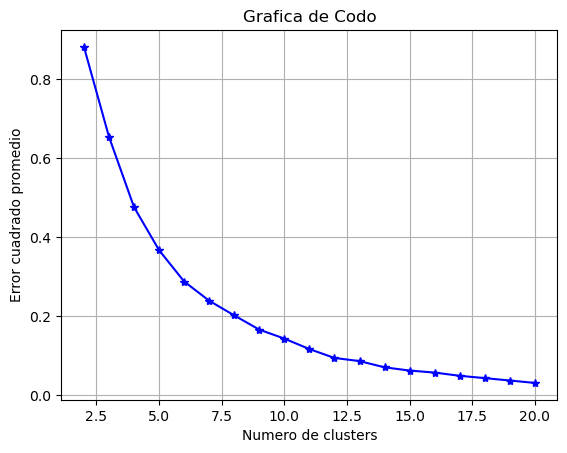

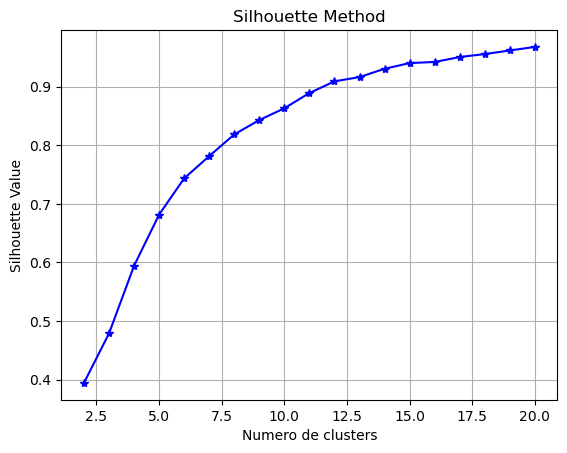

In [109]:
k_algs, k_res = k_selection(df_modelos.drop(['COD_COL'], axis = 1), 2, 20)

<a name="e5_kmsel"></a>
## 6.2.2 [&#9680;](#e5_kmeans) Selección de k

<hr style="border:1px solid black"> </hr>

In [110]:
k = 8

In [111]:
algorithm = k_algs[k-2] # 
clustering = k_res[k-2] # 

In [112]:
cls_list = algorithm.predict(df_modelos.drop(['COD_COL'], axis = 1))

In [113]:
df_kmeans = df_modelos.copy()

In [114]:
df_kmeans.insert(len(df_modelos.columns), 'Cluster', cls_list, True)
df_kmeans.head(3)

,COD_COL,COLE_GENEROPOBLACION_F,COLE_GENEROPOBLACION_M,COLE_GENEROPOBLACION_MI,MODE_ESTRATOVIVIENDA_Estrato 1,MODE_ESTRATOVIVIENDA_Estrato 2,MODE_ESTRATOVIVIENDA_Estrato 3,MODE_ESTRATOVIVIENDA_Estrato 4,MODE_ESTRATOVIVIENDA_Estrato 5,MODE_ESTRATOVIVIENDA_Estrato 6,MODE_ESTRATOVIVIENDA_Sin Estrato,CARACTER_IE_ACADEMICO,CARACTER_IE_NO APLICA,CARACTER_IE_None,CARACTER_IE_TECNICO,CARACTER_IE_TECNICO/ACADEMICO,Cluster
0,205790000235,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,2
1,105147000568,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1
2,105147000401,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [115]:
df_unificado['Cluster'] = df_kmeans['Cluster'].copy()
df_unificado.to_csv('..\Archivos\BD_Clustered.csv' , sep= '|')

<a name="e5_kmeval"></a>
## 6.2.3 [&#9680;](#e5_kmeans) Evaluación de Resultados

1. [COLE_GENEROPOBLACION](#e5_genero)
2. [MODE_ESTRATOVIVIENDA](#e5_estrato)
3. [CARACTER_IE](#e5_caracter)

<hr style="border:1px solid black"> </hr>

In [116]:
df_eval = df_kmeans.copy()
df_eval['COLE_GENEROPOBLACION'] = df.loc[:,'COLE_GENEROPOBLACION']
df_eval['MODE_ESTRATOVIVIENDA'] = df.loc[:,'MODE_ESTRATOVIVIENDA']
df_eval['CARACTER_IE'] = df.loc[:,'CARACTER_IE']
df_eval.head(3)

,COD_COL,COLE_GENEROPOBLACION_F,COLE_GENEROPOBLACION_M,COLE_GENEROPOBLACION_MI,MODE_ESTRATOVIVIENDA_Estrato 1,MODE_ESTRATOVIVIENDA_Estrato 2,MODE_ESTRATOVIVIENDA_Estrato 3,MODE_ESTRATOVIVIENDA_Estrato 4,MODE_ESTRATOVIVIENDA_Estrato 5,MODE_ESTRATOVIVIENDA_Estrato 6,MODE_ESTRATOVIVIENDA_Sin Estrato,CARACTER_IE_ACADEMICO,CARACTER_IE_NO APLICA,CARACTER_IE_None,CARACTER_IE_TECNICO,CARACTER_IE_TECNICO/ACADEMICO,Cluster,COLE_GENEROPOBLACION,MODE_ESTRATOVIVIENDA,CARACTER_IE
0,205790000235,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,2,MI,Estrato 1,ACADEMICO
1,105147000568,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,MI,Estrato 2,TECNICO/ACADEMICO
2,105147000401,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,MI,Estrato 2,ACADEMICO


<a name="e5_genero"></a>
### 6.2.3.1 [&#9700;](#e5_kmeval) COLE_GENEROPOBLACION
<hr style="border:1px solid blue"> </hr>

In [117]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'COLE_GENEROPOBLACION')
tbl_pvt

Cluster,0,1,2,3,4,5,6,7
COLE_GENEROPOBLACION,,,,,,,,
F,2,3,0,4,16,0,0,7
M,1,0,0,0,1,0,0,2
MI,253,165,198,74,112,74,24,32


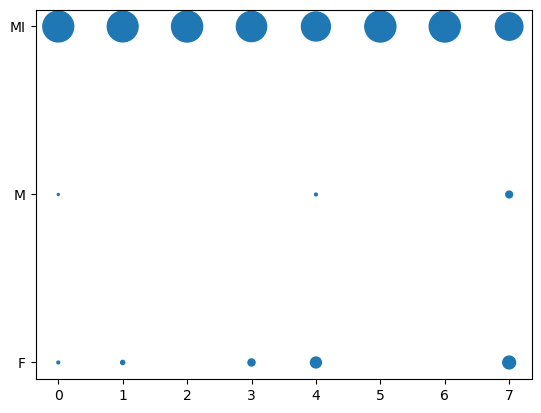

In [118]:
cluster_scatter_plot(tbl_frm,'COLE_GENEROPOBLACION')

<a name="e5_estrato"></a>
### 6.2.3.2 [&#9700;](#e5_kmeval) MODE_ESTRATOVIVIENDA
<hr style="border:1px solid blue"> </hr>

In [119]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'MODE_ESTRATOVIVIENDA')
tbl_pvt

Cluster,0,1,2,3,4,5,6,7
MODE_ESTRATOVIVIENDA,,,,,,,,
Estrato 1,0,0,198,0,0,74,24,0
Estrato 2,256,166,0,0,0,0,0,0
Estrato 3,0,0,0,78,129,0,0,0
Estrato 4,0,1,0,0,0,0,0,21
Estrato 5,0,0,0,0,0,0,0,15
Estrato 6,0,0,0,0,0,0,0,3
Sin Estrato,0,1,0,0,0,0,0,2


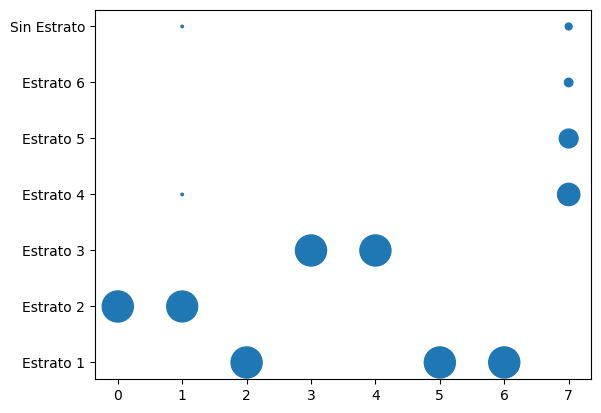

In [120]:
cluster_scatter_plot(tbl_frm,'MODE_ESTRATOVIVIENDA')

<a name="e5_caracter"></a>
### 6.2.3.3 [&#9700;](#e5_kmeval) CARACTER_IE
<hr style="border:1px solid blue"> </hr>

In [121]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'CARACTER_IE')
tbl_pvt

Cluster,0,1,2,3,4,5,6,7
CARACTER_IE,,,,,,,,
ACADEMICO,231,0,187,0,129,0,0,39
NO APLICA,6,0,0,2,0,0,24,0
None,5,0,5,3,0,0,0,1
TECNICO,14,0,6,15,0,0,0,1
TECNICO/ACADEMICO,0,168,0,58,0,74,0,0


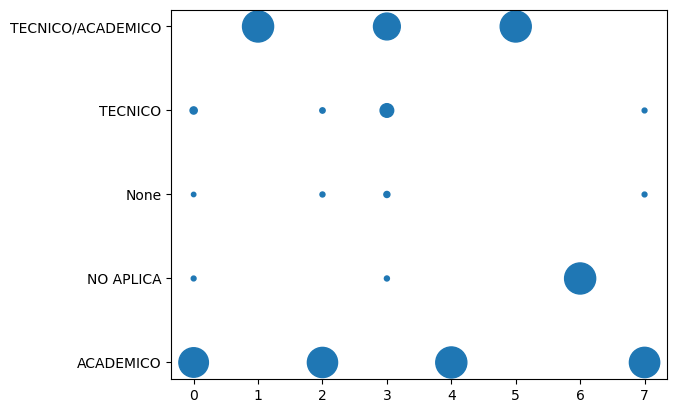

In [122]:
cluster_scatter_plot(tbl_frm,'CARACTER_IE')

<a name="e5_prueba"></a>
## 6.2.4 [&#9680;](#e5_kmeans) Prueba Clasificacion

<hr style="border:1px solid black"> </hr>

In [123]:
#se extrae un registro para prueba
prueba = np.array(df_kmeans.drop(['COD_COL','Cluster'], axis = 1).iloc[0,:]).reshape(1, -1)
print(prueba)

[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]]


In [124]:
#se predice el cluster al que pertenece
algorithm.predict(prueba)[0]

2

<a name="e5_centroides"></a>
## 6.2.5 [&#9680;](#e5_kmeans) Centroides

<hr style="border:1px solid black"> </hr>

In [125]:
centroides = algorithm.cluster_centers_
for i in range(len(centroides)):
    print('Centroide Cluster ',i,'\n',centroides[i],'\n')

Centroide Cluster  0 
 [ 7.81250000e-03  3.90625000e-03  9.88281250e-01  2.22044605e-16
  1.00000000e+00 -2.77555756e-16  1.38777878e-17  1.73472348e-17
  2.60208521e-18  2.60208521e-18  9.02343750e-01  2.34375000e-02
  1.95312500e-02  5.46875000e-02 -2.77555756e-16] 

Centroide Cluster  1 
 [ 1.78571429e-02  3.46944695e-18  9.82142857e-01  2.22044605e-16
  9.88095238e-01 -1.94289029e-16  5.95238095e-03  1.38777878e-17
 -8.67361738e-19  5.95238095e-03 -4.44089210e-16  2.77555756e-17
 -3.46944695e-18  6.93889390e-18  1.00000000e+00] 

Centroide Cluster  2 
 [ 3.46944695e-17  4.33680869e-18  1.00000000e+00  1.00000000e+00
  1.11022302e-16 -2.49800181e-16  6.93889390e-18  1.38777878e-17
  4.33680869e-19  4.33680869e-19  9.44444444e-01  3.46944695e-17
  2.52525253e-02  3.03030303e-02 -2.77555756e-16] 

Centroide Cluster  3 
 [ 5.12820513e-02  8.67361738e-19  9.48717949e-01  5.55111512e-17
  1.11022302e-16  1.00000000e+00  3.46944695e-18  1.73472348e-18
 -1.30104261e-18 -1.30104261e-18  1.1

In [126]:
df_centroides = pd.DataFrame(centroides)
df_centroides.head(3)
df_centroides.to_csv('..\Archivos\centroides.csv' , sep= '|')

In [127]:
#se extrae un registro para prueba
prueba = np.array(df_kmeans.drop(['COD_COL','Cluster'], axis = 1).iloc[0,:]).reshape(1, -1)
print(prueba)

[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]]


#### Distancia euclidea

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Euclidea.PNG" width="250" align="center"></a>

In [128]:
distancias = []
for i in centroides:
    distancias.append(distance.euclidean(prueba, i))
    #distancias.append(np.sqrt(np.sum(np.square(prueba-i))))
distancias

[1.4190390674678413,
 1.9942519440448168,
 0.06813503819814183,
 1.8966561114226037,
 1.4257666457781402,
 1.414213562373095,
 1.414213562373095,
 1.2195121951219512]

In [129]:
min_value = min(distancias)
min_index = distancias.index(min_value)
print('cluster = ',min_index)

cluster =  2


<a name="e5_kmodes"></a><hr style="border:1px solid black"> </hr>

## 6.3. [&#9678;](#e5) k-modes

1. [Modelo - Métodos de selección de k](#e5_metodos2)
2. [Selección de k](#e5_kmsel2)
3. [Evaluación de Resultados](#e5_kmeval2)
    1. [COLE_GENEROPOBLACION](#e5_genero2)
    2. [MODE_ESTRATOVIVIENDA](#e5_estrato2)
    3. [CARACTER_IE](#e5_caracter2)
4. [Prueba Clasificacion](#e5_prueba2)
5. [Centroides](#e5_centroides2)

<hr style="border:1px solid black"> </hr>

<a name="e5_metodos2"></a>
## 6.3.1 [&#9680;](#e5_kmodes) Modelo - Métodos de selección de k

<hr style="border:1px solid black"> </hr>

Se corre el modelo de K-modes para diferentes valores de **K** (número de clusters) y evaluando que tan adecuada es cada valor de k midiendo la distancia de os puntos a los centroides de su respectivo cluster, entre mejor segmentados estén los grupos menor será esta distancia.

Si se divide en demasiados clusters el modelo perdería sentido y si se divide en pocos clusters las distancias serían muy grandes, es por esto que aplicamos los siguientes métodos conocidos como el método del codo y el método de Silhouette.

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2111.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2300.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 100, cost: 2111.0
Best run was number 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 223, cost: 1848.0
Run 1, iteration: 2/100, moves: 6, cost: 1846.0
Run 1, iteration: 3/100, moves: 0, cost: 1846.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves

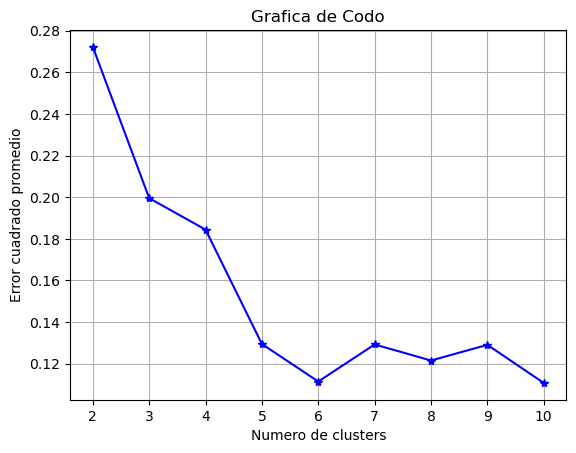

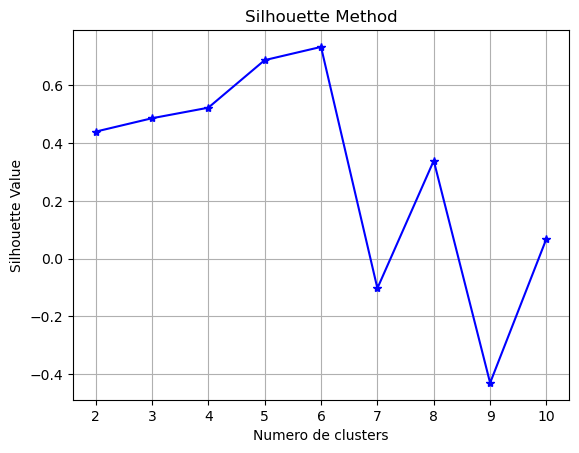

In [130]:
k_algs,kres = k_selection_2(df_modelos, 2, 10)

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/error2.PNG" width="500" align="Left"></a>

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/errorsil.PNG" width="500" align="Left"></a>

<a name="e5_kmsel2"></a>
## 6.3.2 [&#9680;](#e5_kmodes) Selección de k

<hr style="border:1px solid black"> </hr>

In [131]:
k = 6

In [132]:
algorithm = k_algs[k-2] # 
clustering = k_res[k-2] # 

In [133]:
cls_list = algorithm.fit_predict(df_modelos.drop(['COD_COL'], axis = 1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 532.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 37, cost: 794.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 61, cost: 539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 426.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 422.0
Best run was number 5


In [134]:
df_kmodes = df_modelos.copy()

In [135]:
df_kmodes.insert(len(df_modelos.columns), 'Cluster', cls_list, True)
df_kmodes.head(3)

,COD_COL,COLE_GENEROPOBLACION_F,COLE_GENEROPOBLACION_M,COLE_GENEROPOBLACION_MI,MODE_ESTRATOVIVIENDA_Estrato 1,MODE_ESTRATOVIVIENDA_Estrato 2,MODE_ESTRATOVIVIENDA_Estrato 3,MODE_ESTRATOVIVIENDA_Estrato 4,MODE_ESTRATOVIVIENDA_Estrato 5,MODE_ESTRATOVIVIENDA_Estrato 6,MODE_ESTRATOVIVIENDA_Sin Estrato,CARACTER_IE_ACADEMICO,CARACTER_IE_NO APLICA,CARACTER_IE_None,CARACTER_IE_TECNICO,CARACTER_IE_TECNICO/ACADEMICO,Cluster
0,205790000235,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,105147000568,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,3
2,105147000401,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,5


In [136]:
df_unificado['Cluster'] = df_kmodes['Cluster'].copy()
df_unificado.to_csv('..\Archivos\BD_Clustered2.csv' , sep= '|')

<a name="e5_kmeval2"></a>
## 6.3.3 [&#9680;](#e5_kmodes) Evaluación de Resultados

1. [COLE_GENEROPOBLACION](#e5_genero2)
2. [MODE_ESTRATOVIVIENDA](#e5_estrato2)
3. [CARACTER_IE](#e5_caracter2)

<hr style="border:1px solid black"> </hr>

In [137]:
df_eval = df_kmodes.copy()
df_eval['COLE_GENEROPOBLACION'] = df.loc[:,'COLE_GENEROPOBLACION']
df_eval['MODE_ESTRATOVIVIENDA'] = df.loc[:,'MODE_ESTRATOVIVIENDA']
df_eval['CARACTER_IE'] = df.loc[:,'CARACTER_IE']
df_eval.head(3)

,COD_COL,COLE_GENEROPOBLACION_F,COLE_GENEROPOBLACION_M,COLE_GENEROPOBLACION_MI,MODE_ESTRATOVIVIENDA_Estrato 1,MODE_ESTRATOVIVIENDA_Estrato 2,MODE_ESTRATOVIVIENDA_Estrato 3,MODE_ESTRATOVIVIENDA_Estrato 4,MODE_ESTRATOVIVIENDA_Estrato 5,MODE_ESTRATOVIVIENDA_Estrato 6,MODE_ESTRATOVIVIENDA_Sin Estrato,CARACTER_IE_ACADEMICO,CARACTER_IE_NO APLICA,CARACTER_IE_None,CARACTER_IE_TECNICO,CARACTER_IE_TECNICO/ACADEMICO,Cluster,COLE_GENEROPOBLACION,MODE_ESTRATOVIVIENDA,CARACTER_IE
0,205790000235,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,MI,Estrato 1,ACADEMICO
1,105147000568,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,3,MI,Estrato 2,TECNICO/ACADEMICO
2,105147000401,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,5,MI,Estrato 2,ACADEMICO


<a name="e5_genero2"></a>
### 6.3.3.1 [&#9700;](#e5_kmeval2) COLE_GENEROPOBLACION
<hr style="border:1px solid blue"> </hr>

In [138]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'COLE_GENEROPOBLACION')
tbl_pvt

Cluster,0,1,2,3,4,5
COLE_GENEROPOBLACION,,,,,,
F,7,4,16,3,0,2
M,2,0,1,0,0,1
MI,304,76,112,188,24,228


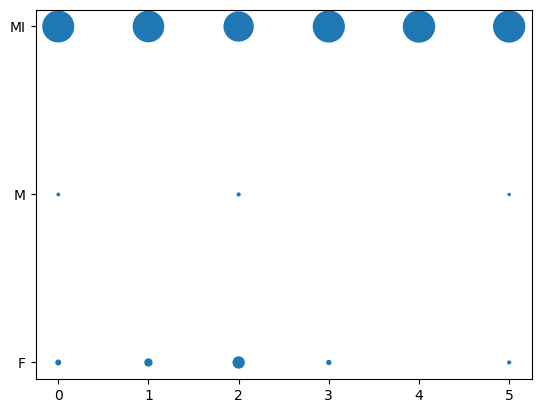

In [139]:
cluster_scatter_plot(tbl_frm,'COLE_GENEROPOBLACION')

<a name="e5_estrato2"></a>
### 6.3.3.2 [&#9700;](#e5_kmeval2) MODE_ESTRATOVIVIENDA
<hr style="border:1px solid blue"> </hr>

In [140]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'MODE_ESTRATOVIVIENDA')
tbl_pvt

Cluster,0,1,2,3,4,5
MODE_ESTRATOVIVIENDA,,,,,,
Estrato 1,272,0,0,0,24,0
Estrato 2,0,0,0,191,0,231
Estrato 3,0,78,129,0,0,0
Estrato 4,21,1,0,0,0,0
Estrato 5,15,0,0,0,0,0
Estrato 6,3,0,0,0,0,0
Sin Estrato,2,1,0,0,0,0


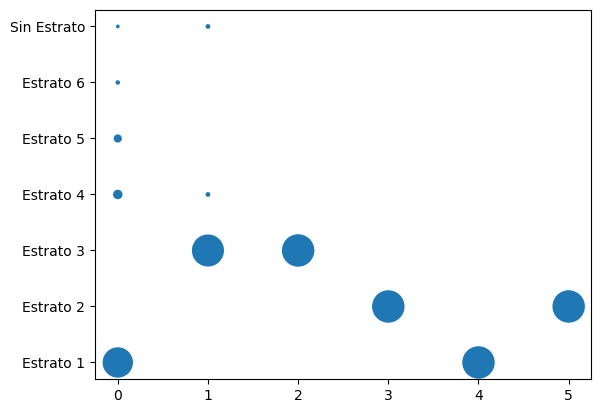

In [141]:
cluster_scatter_plot(tbl_frm,'MODE_ESTRATOVIVIENDA')

<a name="e5_caracter2"></a>
### 6.3.3.3 [&#9700;](#e5_kmeval2) CARACTER_IE
<hr style="border:1px solid blue"> </hr>

In [142]:
tbl_pvt,tbl_frm = tabla_cluster(df_eval,'CARACTER_IE')
tbl_pvt

Cluster,0,1,2,3,4,5
CARACTER_IE,,,,,,
ACADEMICO,226,0,129,0,0,231
NO APLICA,0,2,0,6,24,0
None,6,3,0,5,0,0
TECNICO,7,15,0,14,0,0
TECNICO/ACADEMICO,74,60,0,166,0,0


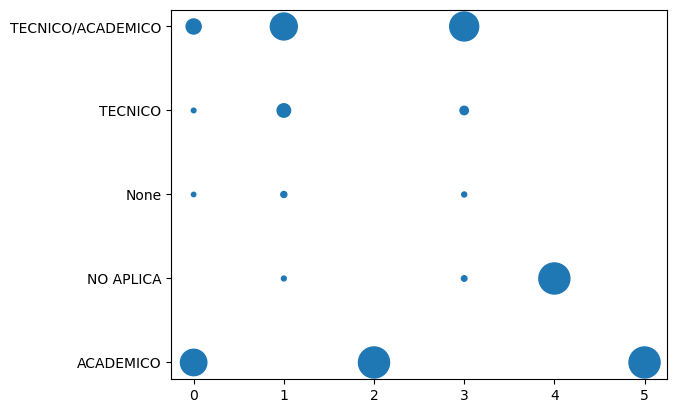

In [143]:
cluster_scatter_plot(tbl_frm,'CARACTER_IE')

<a name="e5_prueba2"></a>
## 6.3.4 [&#9680;](#e5_kmodes) Prueba Clasificacion

<hr style="border:1px solid black"> </hr>

In [144]:
#se extrae un registro para prueba
prueba = np.array(df_kmodes.drop(['COD_COL','Cluster'], axis = 1).iloc[0,:]).reshape(1, -1)
print(prueba)

[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]]


In [145]:
#se predice el cluster al que pertenece
algorithm.predict(prueba)[0]

0

<a name="e5_centroides2"></a>
## 6.3.5 [&#9680;](#e5_kmodes) Centroides

<hr style="border:1px solid black"> </hr>

In [146]:
centroides = algorithm.cluster_centroids_
for i in range(len(centroides)):
    print('Centroide Cluster ',i,'\n',centroides[i],'\n')

Centroide Cluster  0 
 [0 0 1 1 0 0 0 0 0 0 1 0 0 0 0] 

Centroide Cluster  1 
 [0 0 1 0 0 1 0 0 0 0 0 0 0 0 1] 

Centroide Cluster  2 
 [0 0 1 0 0 1 0 0 0 0 1 0 0 0 0] 

Centroide Cluster  3 
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 1] 

Centroide Cluster  4 
 [0 0 1 1 0 0 0 0 0 0 0 1 0 0 0] 

Centroide Cluster  5 
 [0 0 1 0 1 0 0 0 0 0 1 0 0 0 0] 



In [147]:
df_centroides = pd.DataFrame(centroides)
df_centroides.head(3)
df_centroides.to_csv('..\Archivos\centroides2.csv' , sep= '|')

In [148]:
#se extrae un registro para prueba
prueba = np.array(df_kmodes.drop(['COD_COL','Cluster'], axis = 1).iloc[0,:]).reshape(1, -1)
print(prueba)

[[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0]]


#### Distancia Jaccard

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/jaccard.PNG" width="250" align="center"></a>

In [149]:
distancias = []
for i in centroides:
    distancias.append(distance.jaccard(prueba, i))
    #distancias.append(np.sqrt(np.sum(np.square(prueba-i))))
distancias

[0.0, 0.8, 0.5, 0.8, 0.5, 0.5]

In [150]:
min_value = min(distancias)
min_index = distancias.index(min_value)
print('cluster = ',min_index)

cluster =  0


<a name="e6"></a><hr style="border:1px solid green"> </hr>
# 7. [&#9673;](#conte) Etapa 6: Implementación de la interfaz de usuario (FrontEnd)

1. [Barra de Navegacion](#e6_barra)
2. [Presentación](#e6_presentacion)
3. [Equipo de Trabajo](#e6_equipo)
4. [Análisis Exploratorio](#e6_analisis)
5. [Sistema de Recomendación](#e6_sistema)
    1. [Recomendadas por Cercanía](#e6_cercania)
    2. [Recomendadas por Caracteristicas](#e6_caracteristicas)
    3. [Mapa](#e6_mapa)
    4. [Ranking de planteles](#e6_ranking)
    5. [Calificación de los planteles en cada linea de profundización](#e6_linea)

<hr style="border:1px solid green"> </hr>

Finalmente entramos en la etapa que busca poner al alcance de un usuario los desarrollos hasta ahora implementados, para esto se ha puesto a disposición un portal web que permite al usuario buscar instituciones educativas partiendo de una posición y unas características (parámetros) deseadas. Este sistema de recomendación se basa en el modelo de clusterisacion no supervisada implementado previamente en este notebook.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/portal_web.PNG" width="1000" align="center"></a>

<a name="e6_barra"></a><hr style="border:1px solid black"> </hr>

## 7.1. [&#9678;](#e6) Barra de Navegacion

<hr style="border:1px solid black"> </hr>

a travez de la barra de navegacion podra acceder a las diferentes paginas del portal web.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/barra.PNG" width="1000" align="center"></a>

<a name="e6_presentacion"></a><hr style="border:1px solid black"> </hr>

## 7.2. [&#9678;](#e6) Presentación

<hr style="border:1px solid black"> </hr>

en esta pagina podra encontrar todas las generalidades del proyecto

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/presentacion.PNG" width="1000" align="center"></a>

<a name="e6_equipo"></a><hr style="border:1px solid black"> </hr>

## 7.3. [&#9678;](#e6) Equipo de Trabajo

<hr style="border:1px solid black"> </hr>

aca podra encontrar el equipo de desarrollo del proyecto integrador

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/equipo.PNG" width="1000" align="center"></a>

<a name="e6_analisis"></a><hr style="border:1px solid black"> </hr>

## 7.4. [&#9678;](#e6) Análisis Exploratorio 

<hr style="border:1px solid black"> </hr>

en esta página podra encontrar el presente documento en el cual se explica paso a paso la totalidad del desarrollo del proyecto.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Analisis.PNG" width="1000" align="center"></a>

<a name="e6_sistema"></a><hr style="border:1px solid black"> </hr>

## 7.5. [&#9678;](#e6) Sistema de Recomendación

1. [Recomendadas por Cercanía](#e6_cercania)
2. [Recomendadas por Caracteristicas](#e6_caracteristicas)
3. [Mapa](#e6_mapa)
4. [Ranking de planteles](#e6_ranking)
5. [Calificación de los planteles en cada linea de profundización](#e6_linea)

<hr style="border:1px solid black"> </hr>

en esta pagina se podra hacer uso del sistema de recomendacion desarrollado.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/recomendador.PNG" width="1000" align="center"></a>

<a name="e6_cercania"></a>
## 7.5.1 [&#9680;](#e6_sistema) Recomendadas por Cercanía

<hr style="border:1px solid black"> </hr>

por este metodo se filtraran los colegior cercanos a una posicion con un rango dado por el usuario

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/cercania.PNG" width="800" align="center"></a>

<a name="e6_caracteristicas"></a>
## 7.5.2 [&#9680;](#e6_sistema) Recomendadas por Caracteristicas

<hr style="border:1px solid black"> </hr>

por este metodo se filtraran los colegior cercanos a una posicion con un rango dado por el usuario, teniendo en cuenta las caracteristicas del usuario y a que cluster obtenido por el metodo de clasificacion no supervizada ajusta mas el perfil.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/caracteristicas.PNG" width="800" align="center"></a>

<a name="e6_mapa"></a>
## 7.5.3 [&#9680;](#e6_sistema) Mapa

<hr style="border:1px solid black"> </hr>

una vez el usuario realiza una busqueda en el mapa podra visualizar su casa y las instituciones educativas que cumplen con las caracteristicas de su busqueda en el rrango especificado.

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/mapa1.PNG" width="1000" align="center"></a>

si hacemos clic sobre cualquier institucion educativa nos mostrara la informacion de la misma

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/mapa2.PNG" width="1000" align="center"></a>

<a name="e6_ranking"></a>
## 7.5.4 [&#9680;](#e6_sistema) Ranking de planteles

<hr style="border:1px solid black"> </hr>

debajo del mapa se encontraran listadas las 5 instituciones educativas de mayor ranking dentro de los reasultados mostrados en el mapa

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/ranking.PNG" width="1000" align="center"></a>

<a name="e6_linea"></a>
## 7.5.5 [&#9680;](#e6_sistema) Calificación de los planteles en cada linea de profundización

<hr style="border:1px solid black"> </hr>

finalmente encontrara una grafica en la que se comparan el top 5 de instituciones en cada una de las lineas de profundizacion evaluadas en el ICFES

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/por_linea.PNG" width="1000" align="center"></a>

<a name="repo"></a><hr style="border:1px solid green"> </hr>
# 8. [&#9673;](#conte) Repositorio
<hr style="border:1px solid green"> </hr>

todo lo desarrollado en este trabajo se encuentra almacenado en un repositorio publico que podra encontrar en el siguiente enlace:

# [Repositorio](https://github.com/Camilorb07/Integrador_S1_2021)

https://github.com/Camilorb07/Integrador_S1_2021

<a><img src="https://raw.githubusercontent.com/Camilorb07/Integrador_S1_2021/main/Imagenes/Repo.PNG" width="1000" align="center"></a>

<hr style="border:2px solid #004B85"> </hr>